In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
y_train = pd.read_csv('C:/Users/Mass/Desktop/Sibur/train_targets.csv', parse_dates=[0], index_col=0)
X_train = pd.read_csv('C:/Users/Mass/Desktop/Sibur/train_features.csv', parse_dates=[0], index_col=0)
test = pd.read_csv('C:/Users/Mass/Desktop/Sibur/test_features.csv', parse_dates=[0], index_col=0)
sample1 = pd.read_csv('C:/Users/Mass/Desktop/Sibur/sample_submission.csv', parse_dates=[0])

# Это 1 соревнование по анализу данных, в котором я принял участие. К сожалению приёмов, которые нужно использовать при анализе временных рядов на таком маленьком временном отрезке я не знал. Их я узнал в конце соревнования при просмотре чужих решений!

In [4]:
c = pd.concat([X_train, y_train], axis=1, join='inner')

In [5]:
feb = c.loc['2020-02-09':, :]

In [7]:
feb

A_rate     A_CH4    A_C2H6     A_C3H8   A_iC4H10  \
timestamp                                                                  
2020-02-09 00:00:00  38.180977  0.144524  2.737562  42.203553  18.395980   
2020-02-09 00:30:00  41.708752  0.153580  2.732064  42.253690  18.189257   
2020-02-09 01:00:00  42.255931  0.157296  2.726765  42.091440  18.040847   
2020-02-09 01:30:00  42.182658  0.146211  2.728743  42.052320  18.102822   
2020-02-09 02:00:00  42.088499  0.130078  2.705980  42.054647  18.288487   
...                        ...       ...       ...        ...        ...   
2020-04-30 21:30:00  72.009730  0.284151  4.936343  35.758852  16.473834   
2020-04-30 22:00:00  71.854180  0.282501  4.960453  35.877193  16.448487   
2020-04-30 22:30:00  71.783273  0.277686  5.013878  36.271557  16.500147   
2020-04-30 23:00:00  71.717743  0.271105  5.080144  36.616673  16.559533   
2020-04-30 23:30:00  71.730325  0.265635  5.069165  36.602453  16.649167   

                      A_nC4H10  A_iC5H12  A_nC5H12   A_C6H14     B_rate  \
timestamp                                                                 
2020-02-09 00:00:00  25.116770  4.265102  3.696698  3.411777  39.301896   
2020-02-09 00:30:00  25.016380  4.318525  3.783097  3.523587  40.009753   
2020-02-09 01:00:00  24.992053  4.407098  3.908029  3.645566  42.493466   
2020-02-09 01:30:00  25.027353  4.415327  3.885792  3.611360  43.049704   
2020-02-09 02:00:00  25.119287  4.391632  3.790096  3.491633  43.369425   
...                        ...       ...       ...       ...        ...   
2020-04-30 21:30:00  24.318968  6.069360  5.527463  6.577563  74.183355   
2020-04-30 22:00:00  24.074193  5.981357  5.407256  6.915378  74.213066   
2020-04-30 22:30:00  24.010123  5.829363  5.160329  6.884173  74.144367   
2020-04-30 23:00:00  24.008848  5.750492  5.017941  6.642076  74.320575   
2020-04-30 23:30:00  24.150503  5.752792  4.997528  6.459137  74.327170   

                       B_C2H6     B_C3H8   B_iC4H10   B_nC4H10  
timestamp                                                       
2020-02-09 00:00:00  2.672256  39.521247  16.722926  24.561706  
2020-02-09 00:30:00  2.584262  38.791828  16.556063  24.685297  
2020-02-09 01:00:00  2.627789  40.336334  16.218371  24.256393  
2020-02-09 01:30:00  2.638928  40.242281  16.233128  24.225236  
2020-02-09 02:00:00  2.580707  39.287439  16.485868  24.625892  
...                       ...        ...        ...        ...  
2020-04-30 21:30:00  4.816865  35.539156  16.269938  24.770377  
2020-04-30 22:00:00  4.993286  36.067750  16.317757  24.729847  
2020-04-30 22:30:00  5.101574  36.275040  16.295460  24.629889  
2020-04-30 23:00:00  5.210675  36.872917  16.336359  24.438236  
2020-04-30 23:30:00  5.136487  35.860326  16.101509  24.426845  

[3936 rows x 14 columns]

In [8]:
feb.describe()

A_rate        A_CH4       A_C2H6       A_C3H8     A_iC4H10  \
count  3936.000000  3594.000000  3594.000000  3594.000000  3594.000000   
mean     65.372254     0.174172     4.445756    38.397688    17.267739   
std       6.450432     0.067273     0.661074     1.368765     0.487465   
min       0.001080     0.061567     2.542413    24.558818    11.143152   
25%      63.465254     0.114050     4.108648    37.771576    16.959169   
50%      66.835402     0.160599     4.473880    38.619496    17.246896   
75%      69.172624     0.234025     4.905590    39.212663    17.580207   
max      73.292570     0.383002     6.418897    42.253690    18.731053   

          A_nC4H10     A_iC5H12     A_nC5H12      A_C6H14       B_rate  \
count  3594.000000  3594.000000  3594.000000  3594.000000  3894.000000   
mean     24.109425     4.909442     4.743914     5.909905    67.242764   
std       0.503614     0.498117     0.485028     0.797235     4.963329   
min      21.113383     3.621764     1.338103     2.924722    39.301896   
25%      23.735839     4.548854     4.466982     5.607924    65.009577   
50%      24.071558     4.793865     4.710349     5.764101    68.394339   
75%      24.439013     5.203007     4.990220     6.154956    70.551437   
max      27.302493     7.490538     6.912004    30.656385    89.958390   

            B_C2H6       B_C3H8     B_iC4H10     B_nC4H10  
count  3845.000000  3849.000000  3849.000000  3849.000000  
mean      4.625327    37.508987    16.760739    23.962432  
std       3.448133     2.519946     1.195111     1.589734  
min       0.861025     0.026142     0.012764     0.019941  
25%       3.770544    36.625031    16.463361    23.738242  
50%       4.381605    37.482612    16.879471    24.124086  
75%       4.760867    38.403061    17.212566    24.493770  
max      91.573613    61.931856    19.235807    26.426164

### Смотрим на процент пропущенных значений

In [9]:
cols = feb.columns[:]

for col in feb.columns:
    pct_missing = np.mean(feb[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

A_rate - 0%
A_CH4 - 9%
A_C2H6 - 9%
A_C3H8 - 9%
A_iC4H10 - 9%
A_nC4H10 - 9%
A_iC5H12 - 9%
A_nC5H12 - 9%
A_C6H14 - 9%
B_rate - 1%
B_C2H6 - 2%
B_C3H8 - 2%
B_iC4H10 - 2%
B_nC4H10 - 2%


## Здесь я в ручную смотрел каждую колонку и удалял сильно большие/маленькие значения

<AxesSubplot:xlabel='timestamp'>

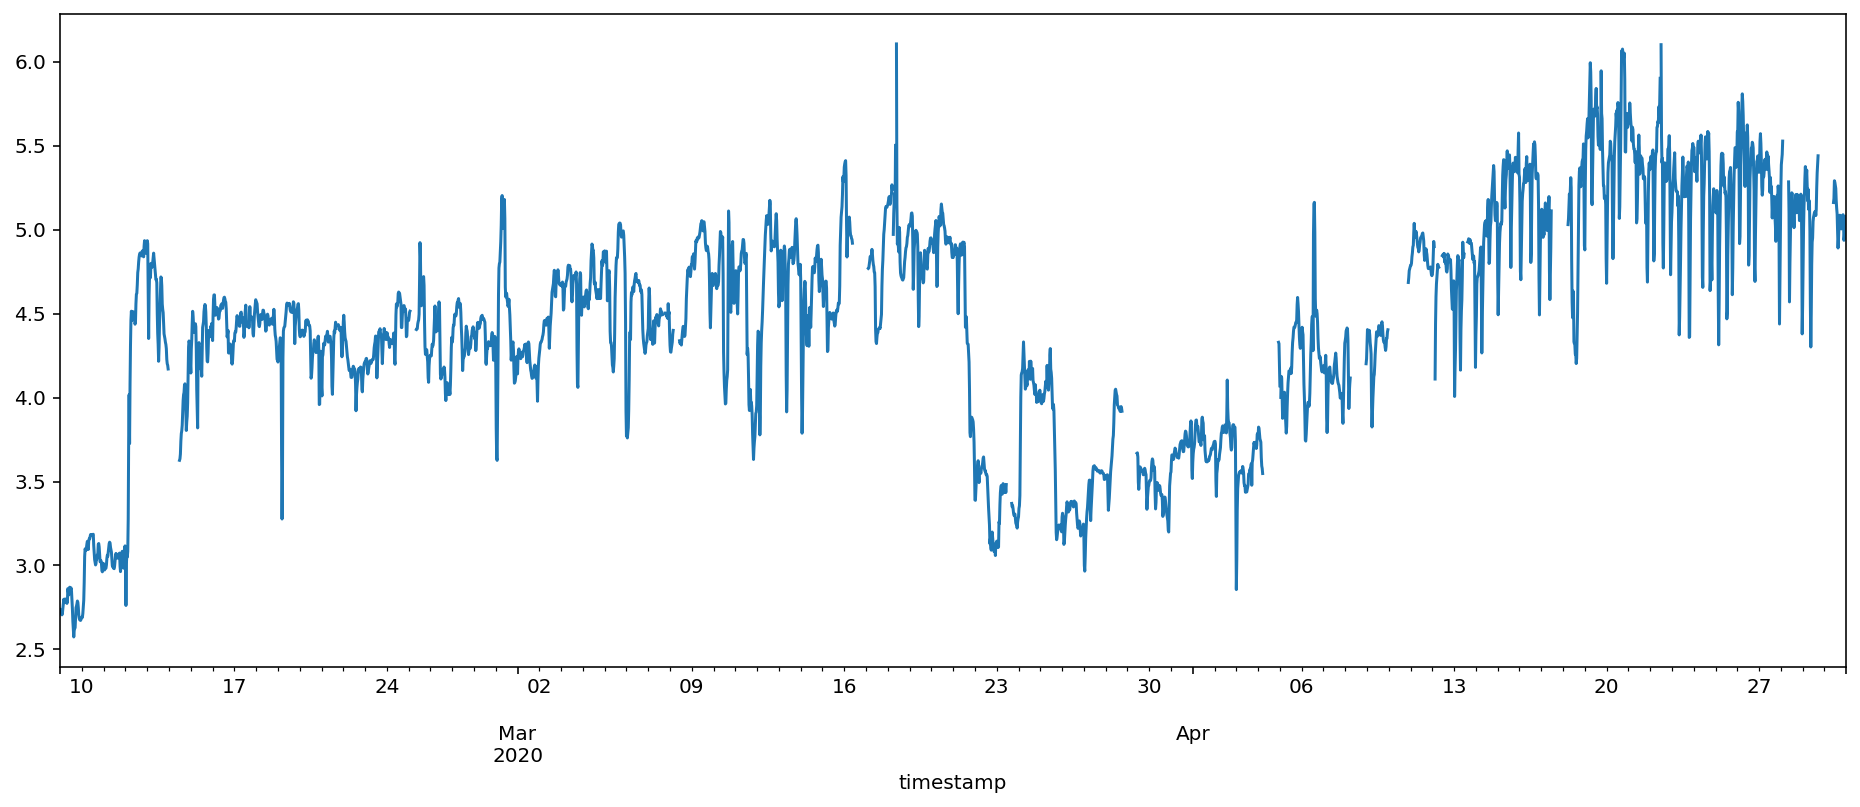

In [13]:
feb['A_C2H6'].plot(figsize=(16,6))

In [12]:
feb.loc[feb['A_C2H6'] < 2.543, 'A_C2H6'] = np.NaN
feb.loc[feb['A_C2H6'] > 6.2, 'A_C2H6'] = np.NaN
feb.loc[feb['A_CH4'] > 0.35, 'A_CH4'] = np.NaN
feb.loc[feb['B_iC4H10'] < 15, 'B_iC4H10'] = np.NaN
feb.loc[feb['B_iC4H10'] > 18.8, 'B_iC4H10'] = np.NaN
feb.loc[feb['B_C3H8'] < 33, 'B_C3H8'] = np.NaN
feb.loc[feb['B_C3H8'] > 44, 'B_C3H8'] = np.NaN
feb.loc[feb['B_nC4H10'] < 22, 'B_nC4H10'] = np.NaN
feb.loc[feb['B_nC4H10'] > 25.8, 'B_nC4H10'] = np.NaN
feb.loc[feb['B_C2H6'] < 2.2, 'B_C2H6'] = np.NaN
feb.loc[feb['B_C2H6'] > 6.1, 'B_C2H6'] = np.NaN
feb.loc[feb['A_C6H14'] < 4.4, 'A_C6H14'] = np.NaN
feb.loc[feb['A_C6H14'] > 8, 'A_C6H14'] = np.NaN
feb.loc[feb['A_nC5H12'] > 5.9, 'A_nC5H12'] = np.NaN
feb.loc[feb['A_nC5H12'] < 3.6, 'A_nC5H12'] = np.NaN
feb.loc[feb['A_iC5H12'] > 6.7, 'A_iC5H12'] = np.NaN
feb.loc[feb['A_iC5H12'] < 3.8, 'A_iC5H12'] = np.NaN
feb.loc[feb['A_nC4H10'] < 22.2, 'A_nC4H10'] = np.NaN
feb.loc[feb['A_nC4H10'] > 25.4, 'A_nC4H10'] = np.NaN
feb.loc[feb['A_iC4H10'] < 15.8, 'A_iC4H10'] = np.NaN
feb.loc[feb['A_C3H8'] < 35.5, 'A_C3H8'] = np.NaN
feb.loc[feb['A_rate'] < 53, 'A_rate'] = np.NaN
feb.loc[feb['B_rate'] < 57.7, 'B_rate'] = np.NaN
feb.loc[feb['B_rate'] > 77, 'B_rate'] = np.NaN

In [14]:
feb['B_rate'].fillna(feb['B_rate'].mean(), inplace=True)

<AxesSubplot:xlabel='timestamp'>

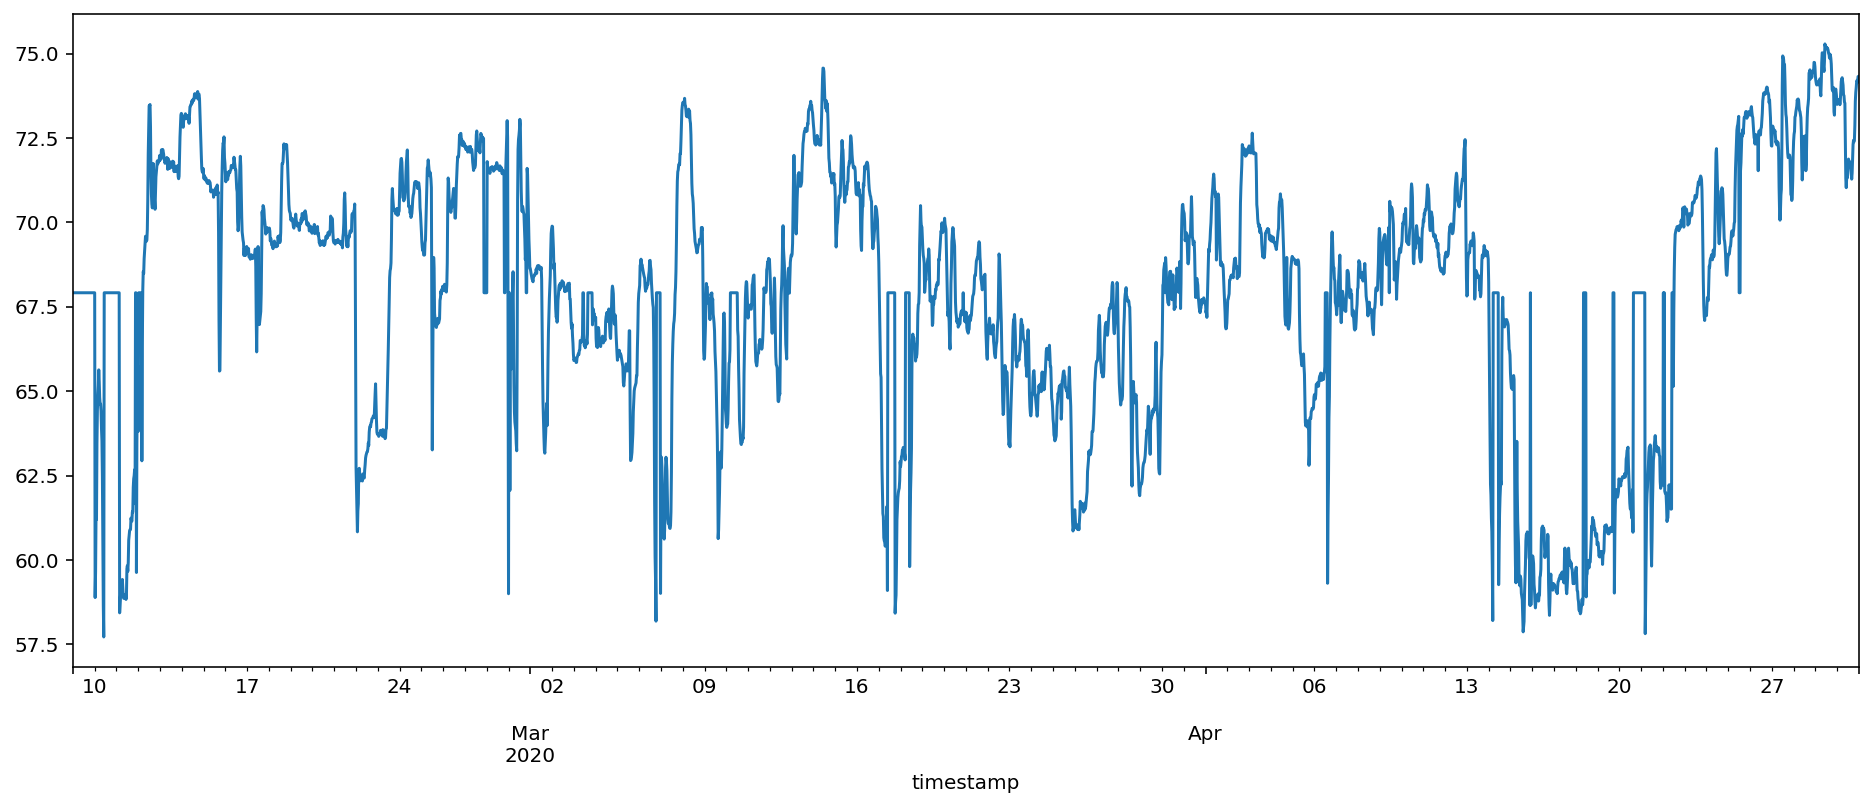

In [15]:
feb['B_rate'].plot(figsize=(16,6))

In [16]:
feb.describe()

A_rate        A_CH4       A_C2H6       A_C3H8     A_iC4H10  \
count  3843.000000  3593.000000  3591.000000  3473.000000  3592.000000   
mean     65.978165     0.174114     4.445210    38.545630    17.269965   
std       4.358098     0.067192     0.659011     1.103085     0.475742   
min      53.022083     0.061567     2.574394    35.521150    15.973183   
25%      63.820121     0.114018     4.108691    37.873693    16.960004   
50%      66.936866     0.160562     4.473505    38.666688    17.247235   
75%      69.219827     0.233971     4.904667    39.230420    17.580263   
max      73.292570     0.342489     6.105778    42.253690    18.731053   

          A_nC4H10     A_iC5H12     A_nC5H12      A_C6H14       B_rate  \
count  3544.000000  3571.000000  3503.000000  3499.000000  3936.000000   
mean     24.088463     4.908061     4.732272     5.930527    67.917343   
std       0.467283     0.482590     0.423572     0.505878     3.708688   
min      22.735853     3.826145     3.600539     4.417589    57.720185   
25%      23.732301     4.550043     4.469225     5.616208    65.965417   
50%      24.063248     4.794245     4.704458     5.774115    68.332124   
75%      24.424733     5.202204     4.974621     6.158292    70.493720   
max      25.393645     6.608027     5.894724     7.982566    75.288904   

            B_C2H6       B_C3H8     B_iC4H10     B_nC4H10  
count  3762.000000  3827.000000  3763.000000  3762.000000  
mean      4.249730    37.607612    16.876148    24.130126  
std       0.712780     1.498990     0.550369     0.544236  
min       2.580707    33.049103    15.199715    22.508543  
25%       3.745699    36.636599    16.490895    23.758542  
50%       4.369305    37.488246    16.892167    24.136994  
75%       4.733199    38.403393    17.219610    24.497634  
max       6.082821    43.178426    18.729426    25.775459

In [17]:
feb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3936 entries, 2020-02-09 00:00:00 to 2020-04-30 23:30:00
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   A_rate    3843 non-null   float64
 1   A_CH4     3593 non-null   float64
 2   A_C2H6    3591 non-null   float64
 3   A_C3H8    3473 non-null   float64
 4   A_iC4H10  3592 non-null   float64
 5   A_nC4H10  3544 non-null   float64
 6   A_iC5H12  3571 non-null   float64
 7   A_nC5H12  3503 non-null   float64
 8   A_C6H14   3499 non-null   float64
 9   B_rate    3936 non-null   float64
 10  B_C2H6    3762 non-null   float64
 11  B_C3H8    3827 non-null   float64
 12  B_iC4H10  3763 non-null   float64
 13  B_nC4H10  3762 non-null   float64
dtypes: float64(14)
memory usage: 461.2 KB


In [21]:
for i in range(10):
    feb['A_rate'].interpolate(inplace=True)
    feb['A_CH4'].interpolate(inplace=True)
    feb['A_C2H6'].interpolate(inplace=True)
    feb['A_C3H8'].interpolate(inplace=True)
    feb['A_iC4H10'].interpolate(inplace=True)
    feb['A_nC4H10'].interpolate(inplace=True)
    feb['A_iC5H12'].interpolate(inplace=True)
    feb['A_nC5H12'].interpolate(inplace=True)
    feb['A_C6H14'].interpolate(inplace=True)
    feb['B_rate'].interpolate(inplace=True)
    feb['B_C2H6'].interpolate(inplace=True)
    feb['B_C3H8'].interpolate(inplace=True)
    feb['B_iC4H10'].interpolate(inplace=True)
    feb['B_nC4H10'].interpolate(inplace=True)

### После интерполяции смотрел на количество значений которые не заменились 

In [22]:
feb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3936 entries, 2020-02-09 00:00:00 to 2020-04-30 23:30:00
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   A_rate    3906 non-null   float64
 1   A_CH4     3936 non-null   float64
 2   A_C2H6    3936 non-null   float64
 3   A_C3H8    3936 non-null   float64
 4   A_iC4H10  3936 non-null   float64
 5   A_nC4H10  3936 non-null   float64
 6   A_iC5H12  3936 non-null   float64
 7   A_nC5H12  3936 non-null   float64
 8   A_C6H14   3895 non-null   float64
 9   B_rate    3936 non-null   float64
 10  B_C2H6    3936 non-null   float64
 11  B_C3H8    3936 non-null   float64
 12  B_iC4H10  3936 non-null   float64
 13  B_nC4H10  3936 non-null   float64
dtypes: float64(14)
memory usage: 461.2 KB


### Дальше смотрел на каждый график после интерполяции

<AxesSubplot:xlabel='timestamp'>

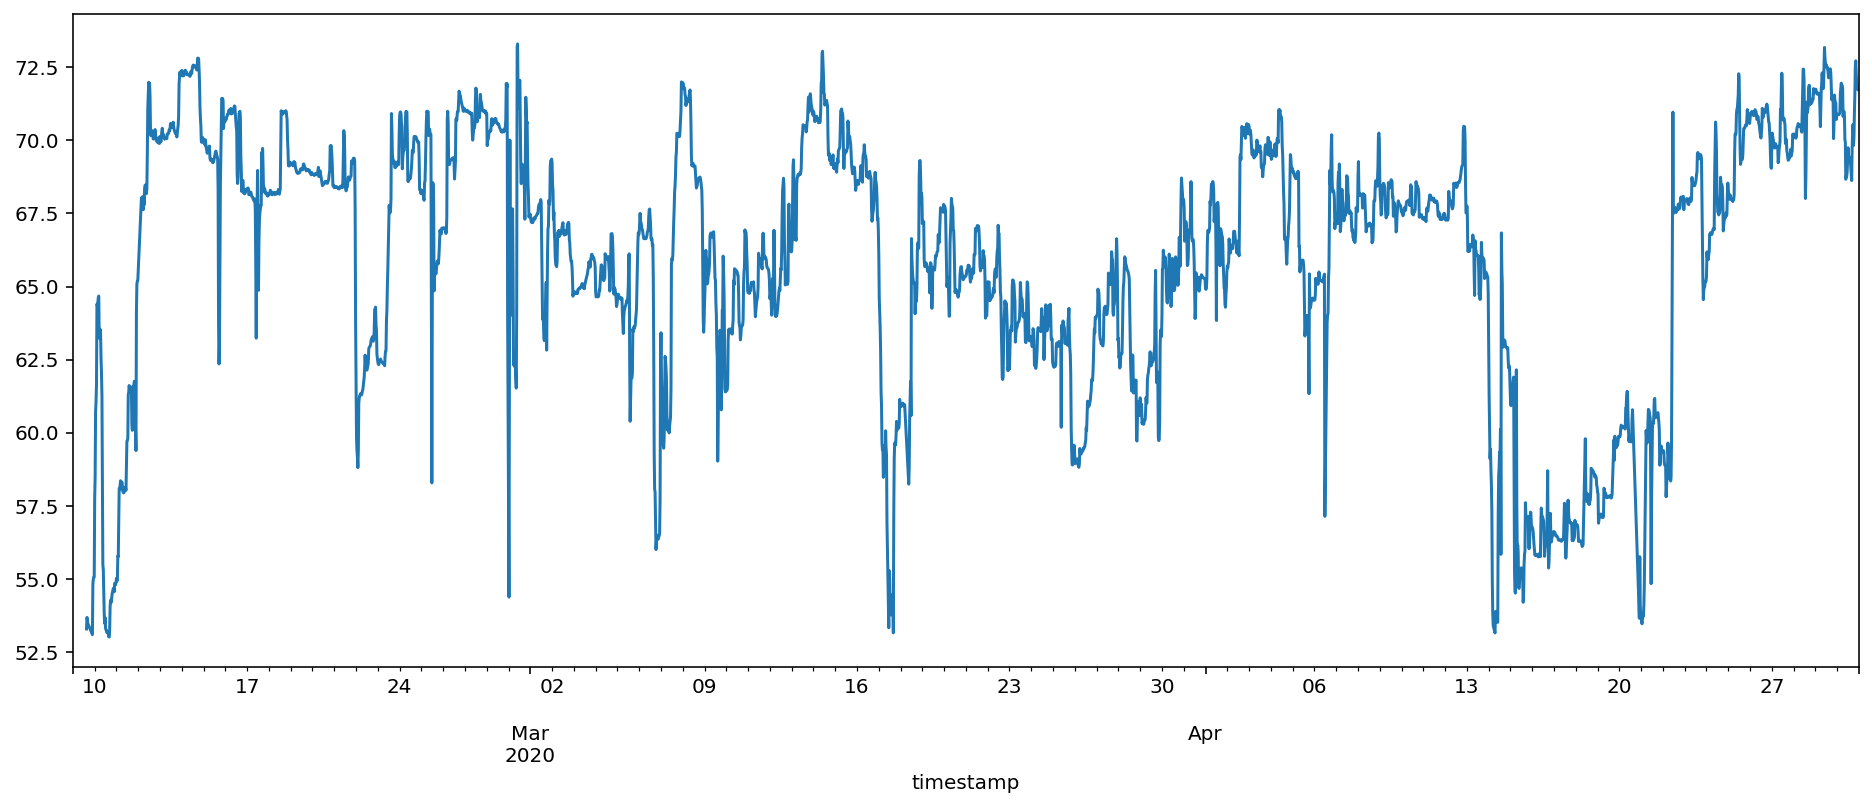

In [23]:
feb['A_rate'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

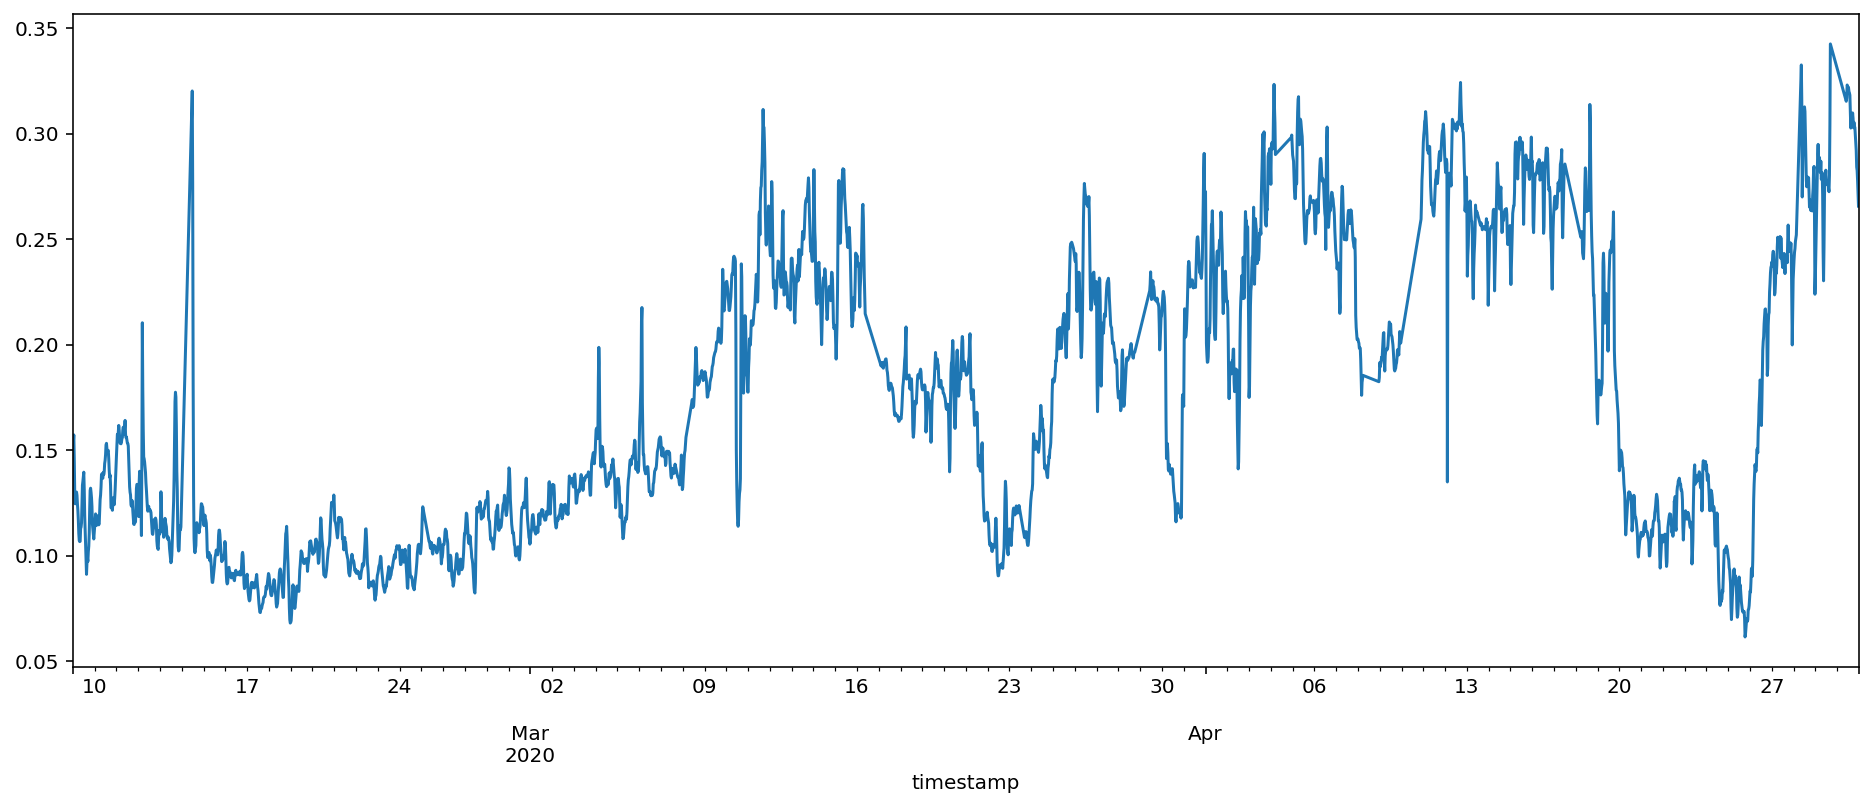

In [172]:
feb['A_CH4'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

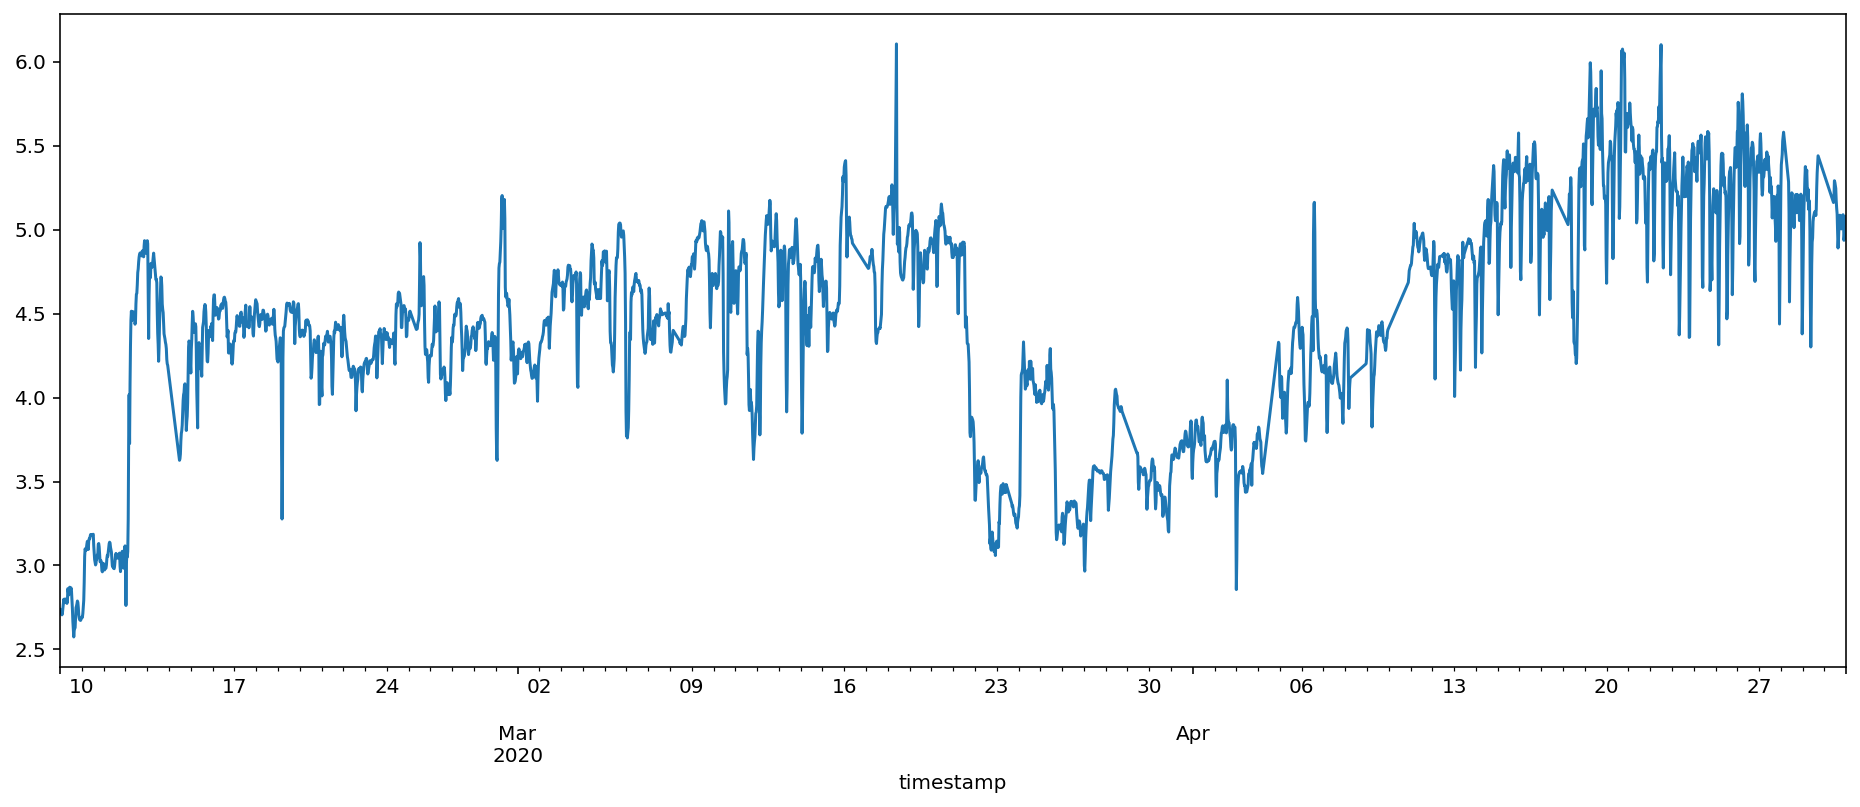

In [180]:
feb['A_C2H6'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

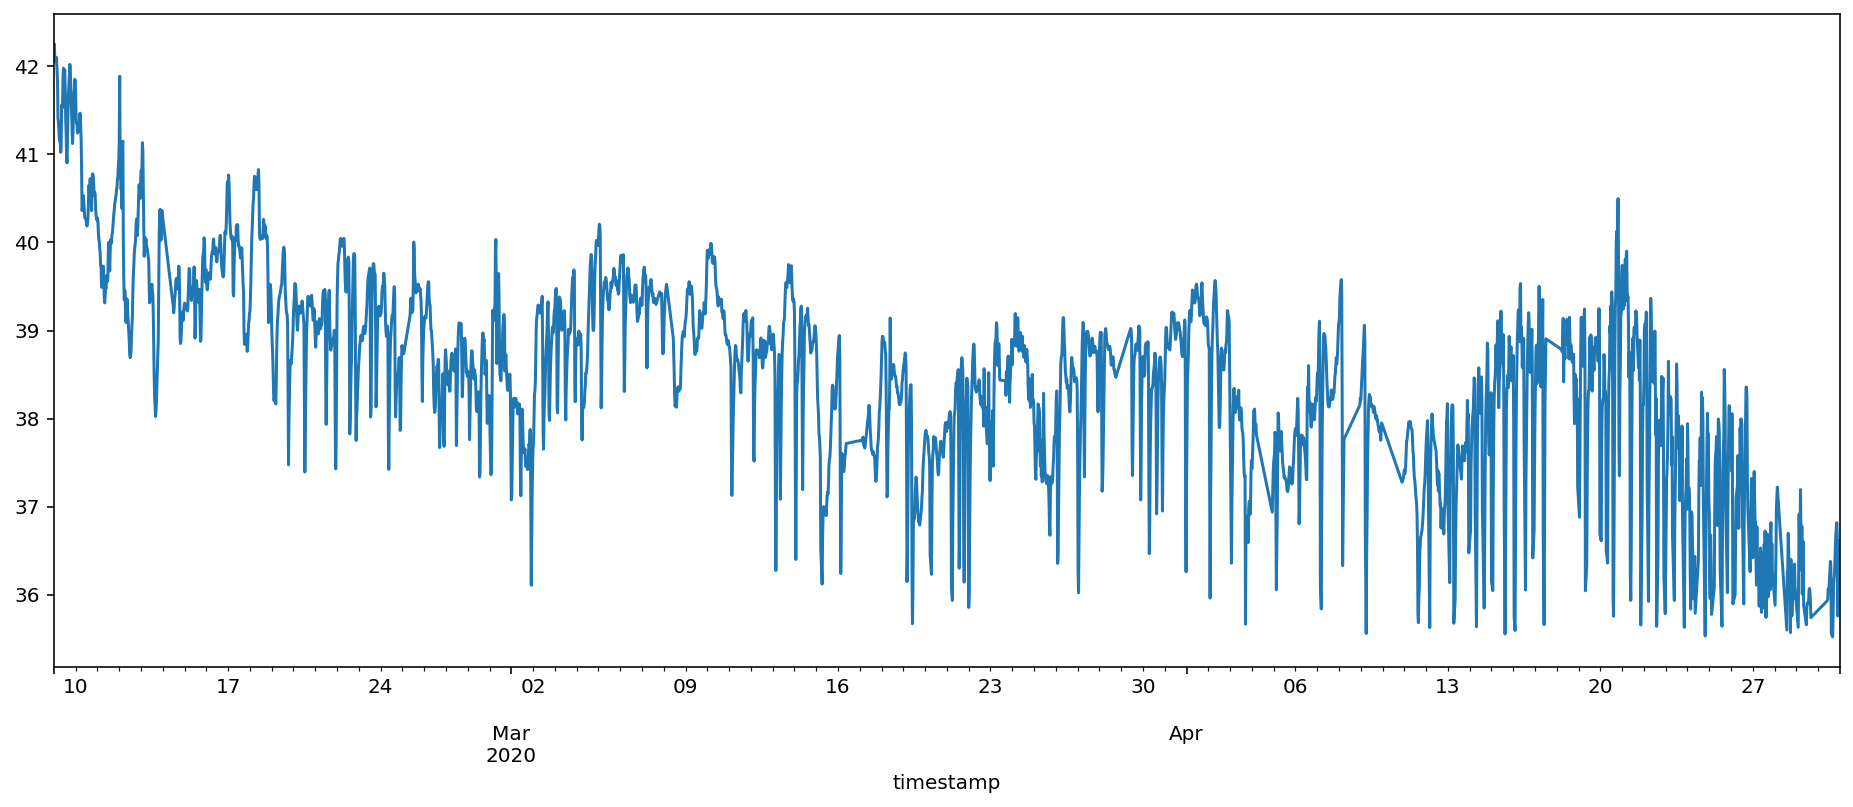

In [181]:
feb['A_C3H8'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

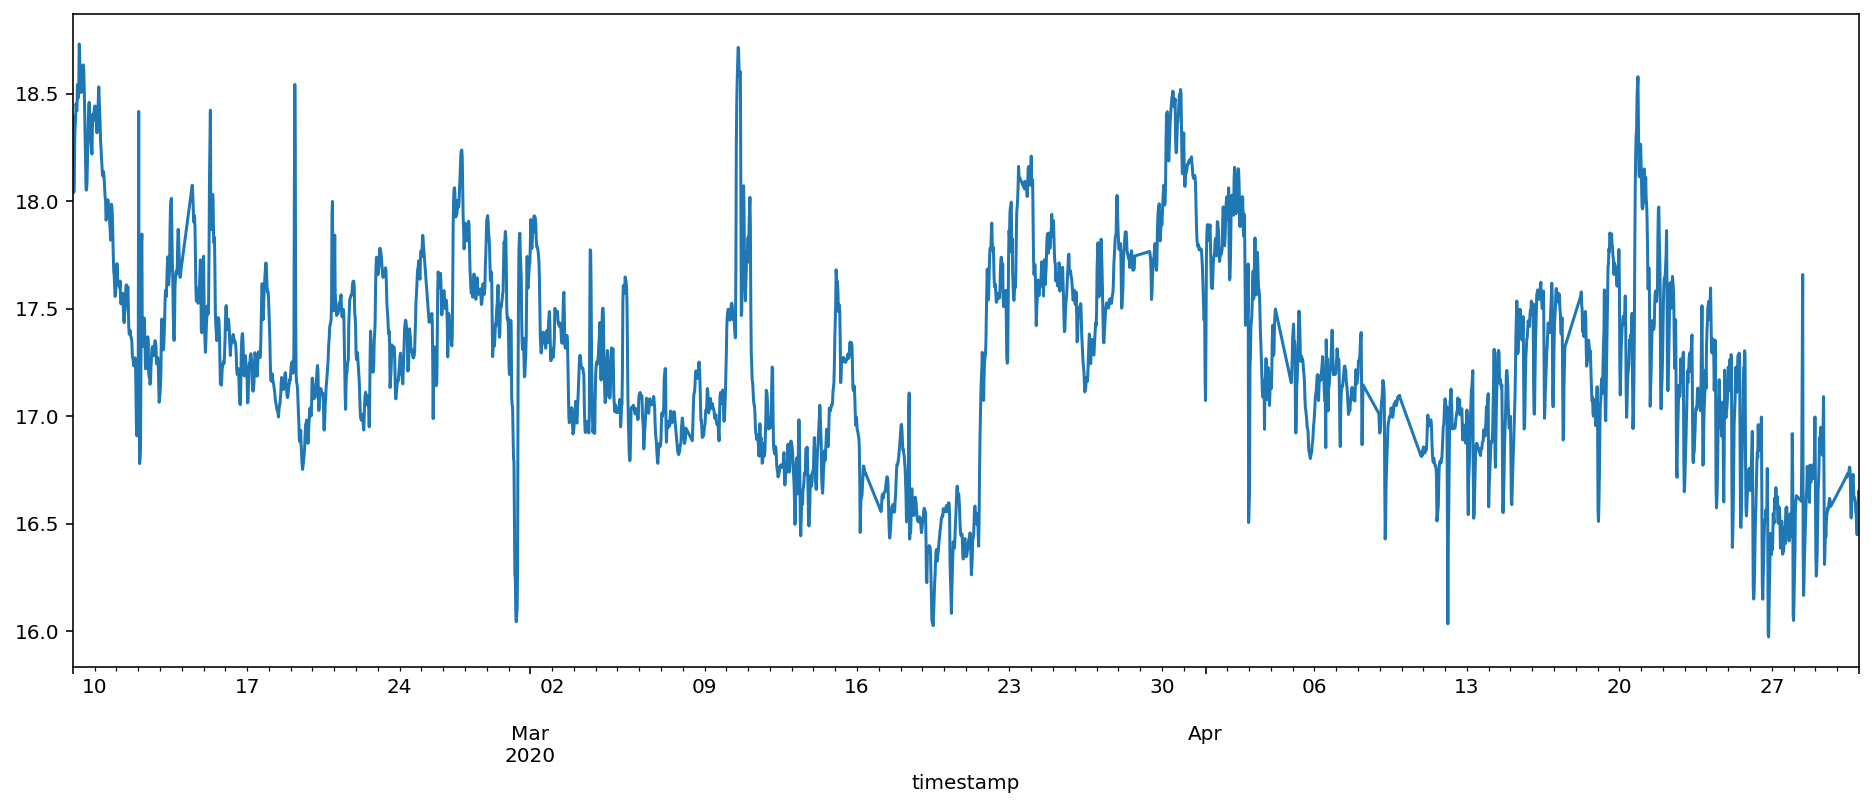

In [182]:
feb['A_iC4H10'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

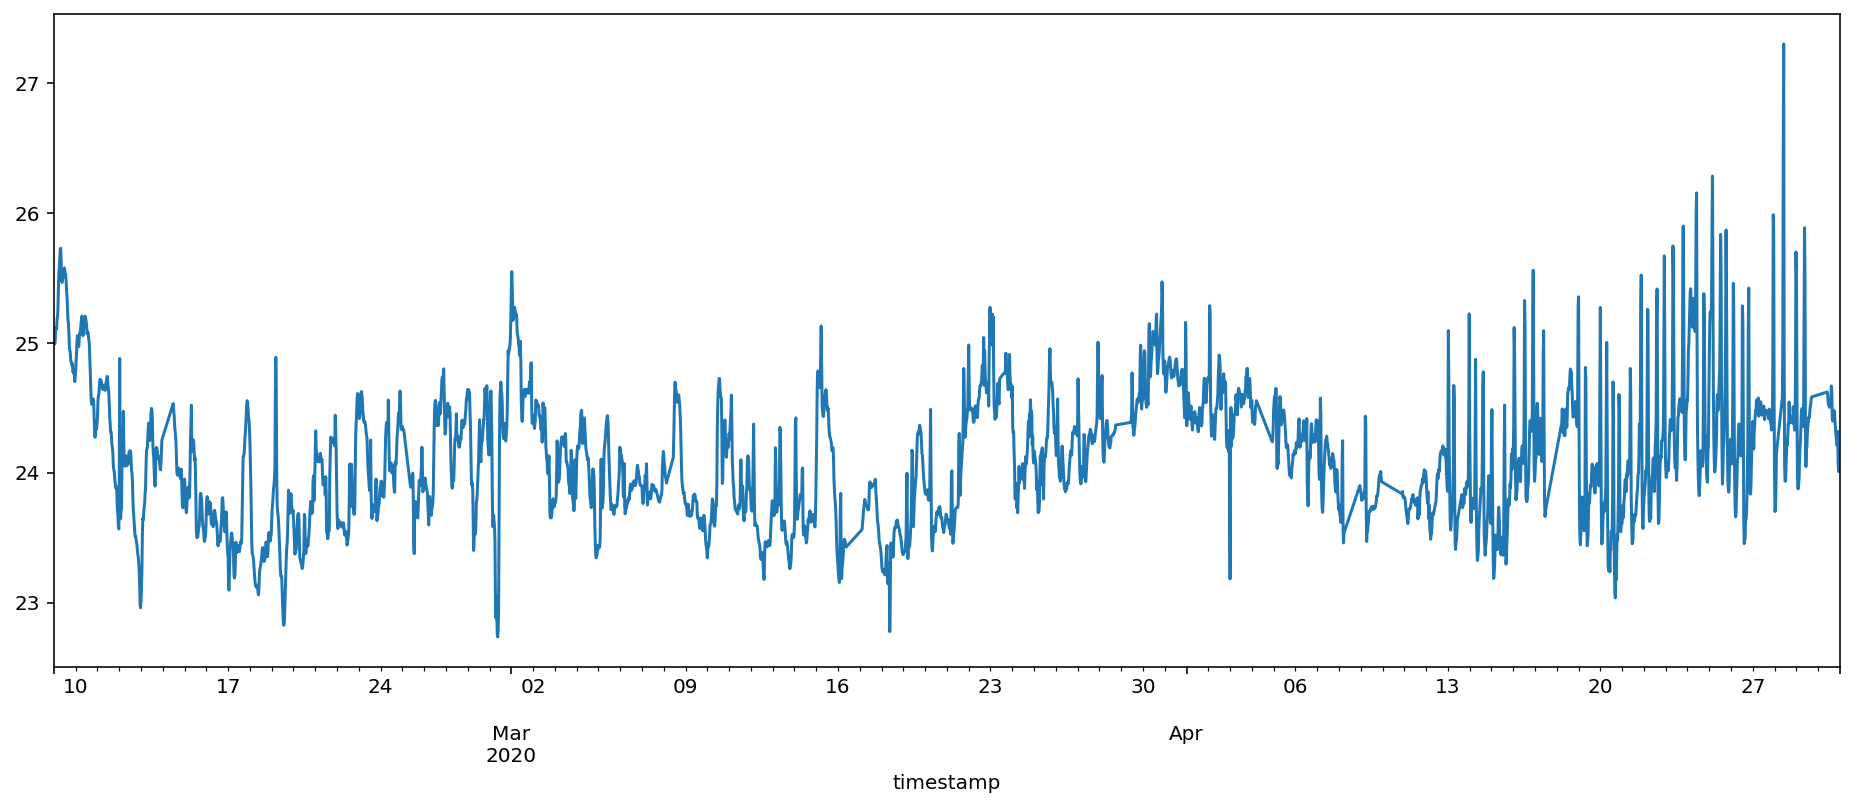

In [183]:
feb['A_nC4H10'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

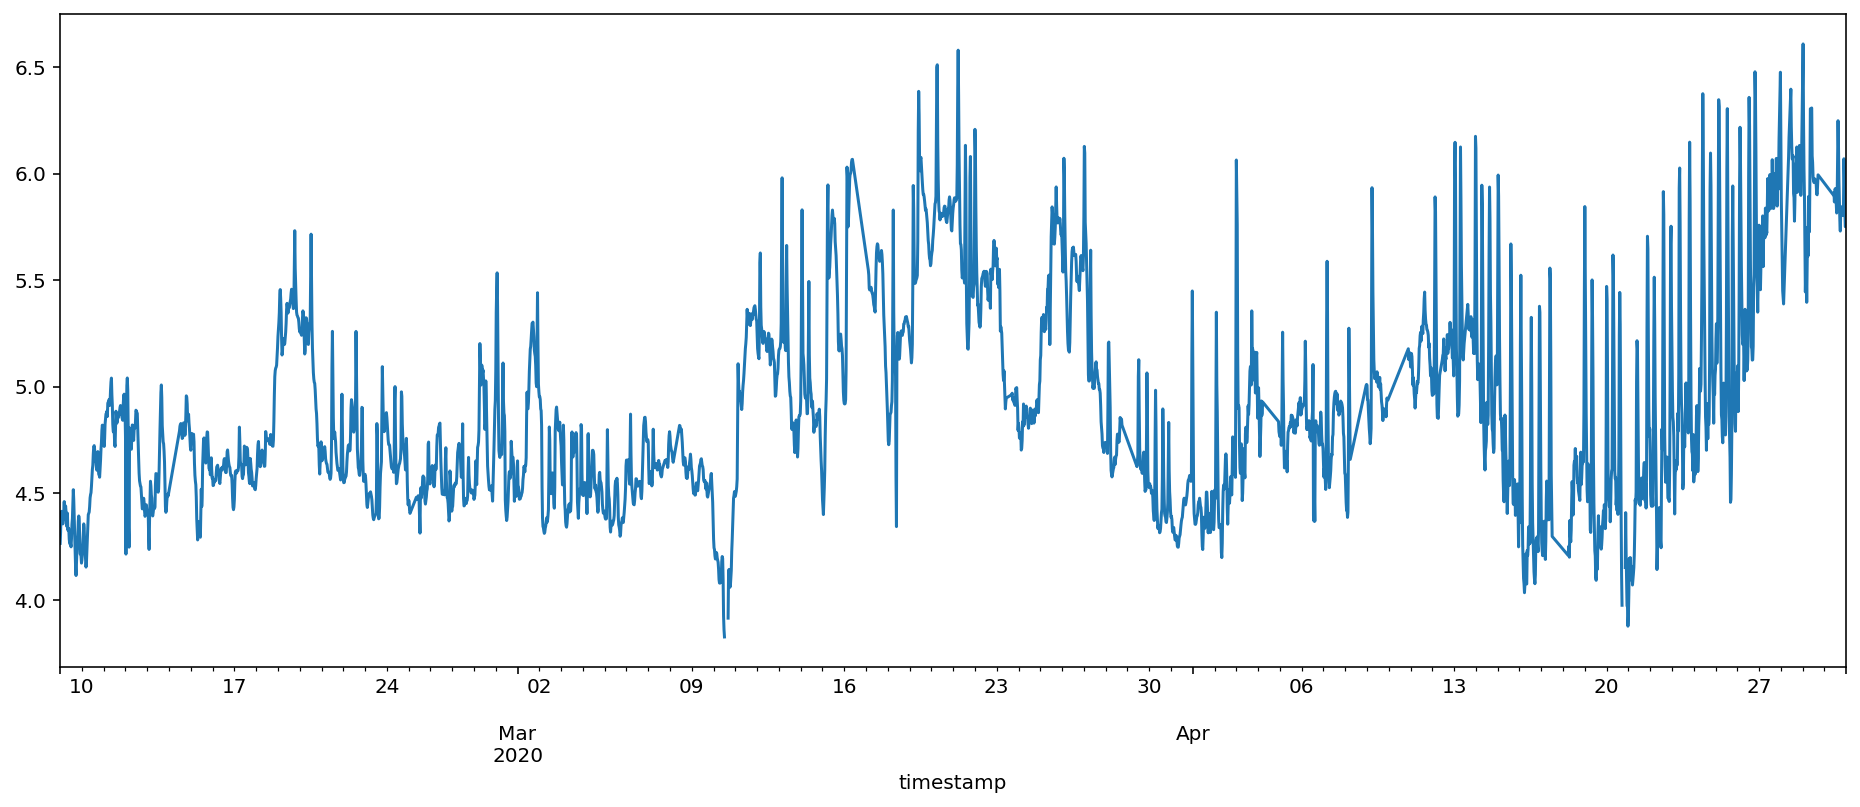

In [186]:
feb['A_iC5H12'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

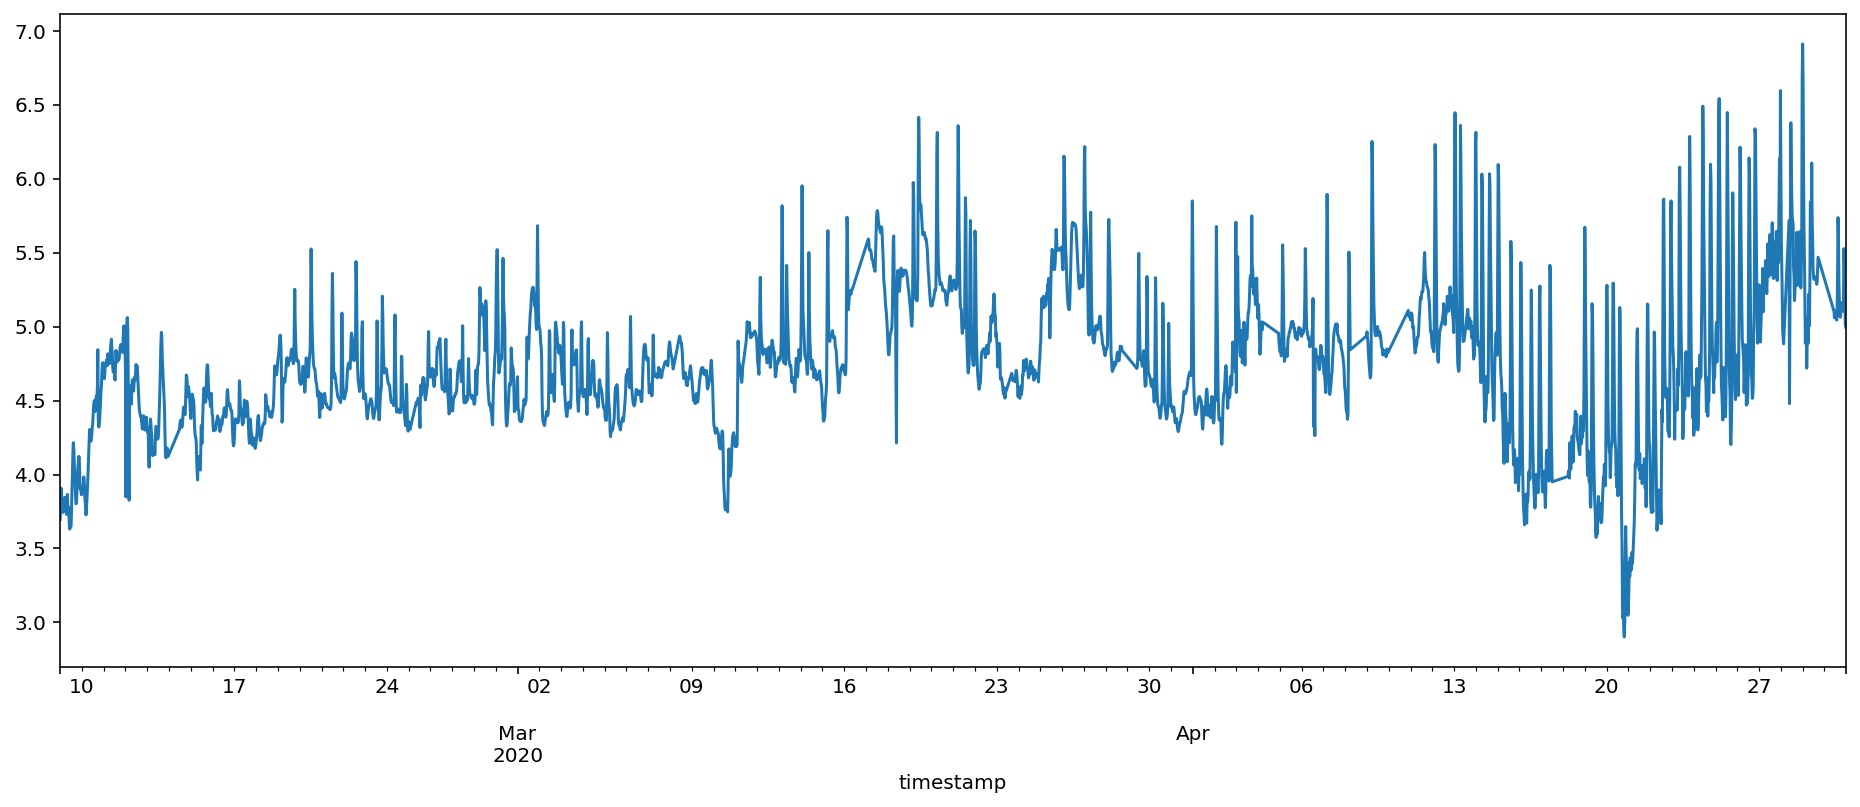

In [187]:
feb['A_nC5H12'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

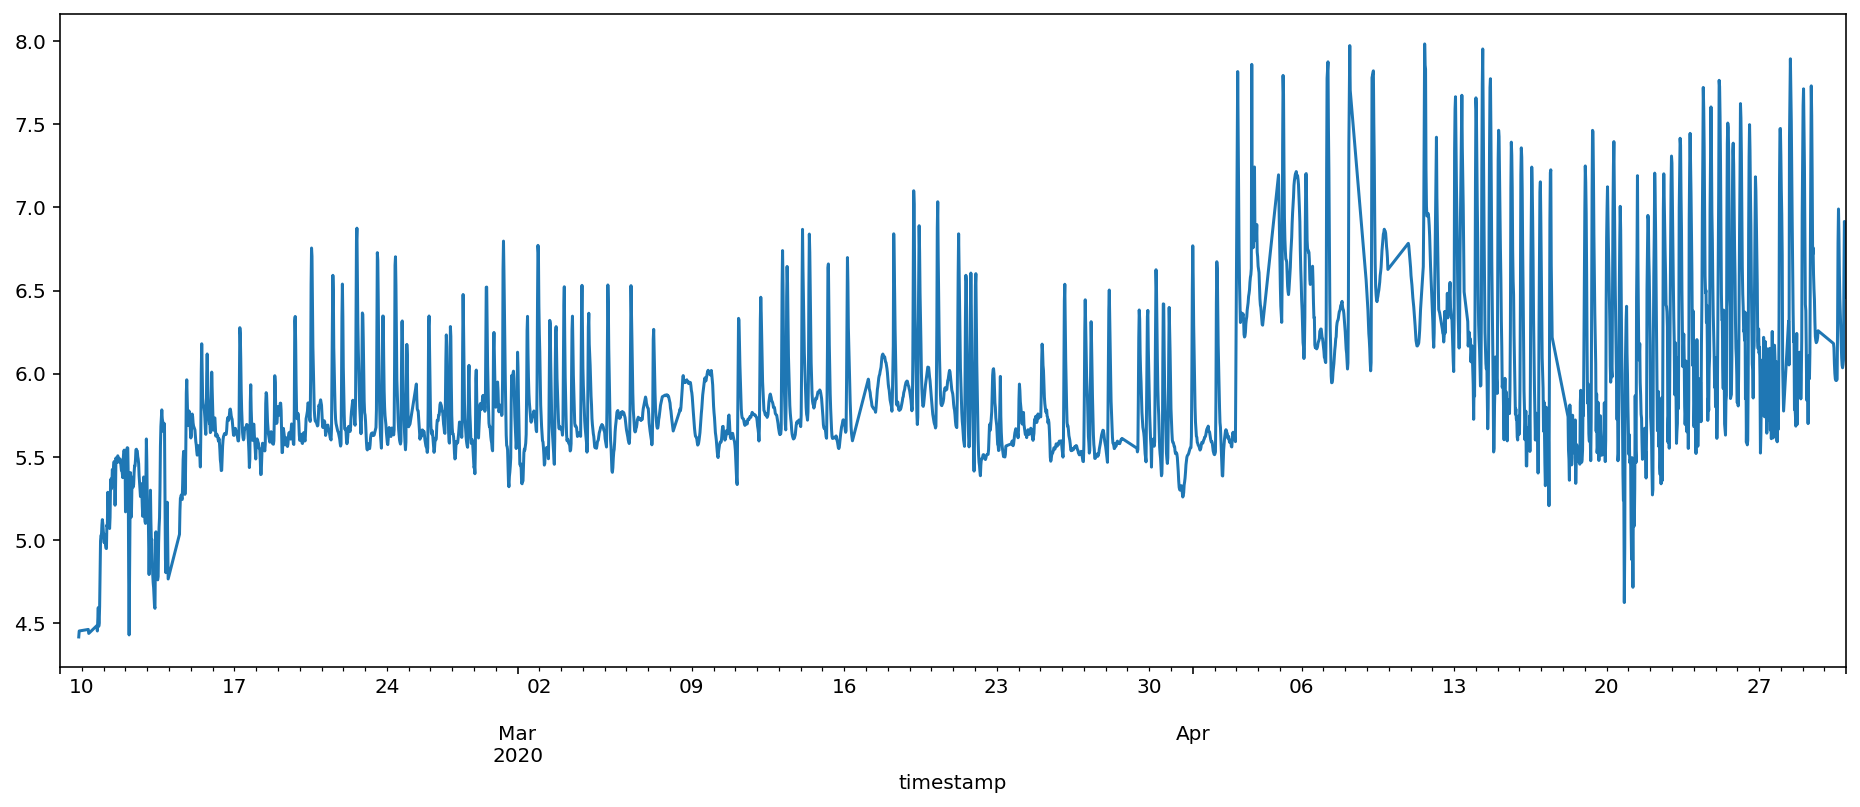

In [188]:
feb['A_C6H14'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

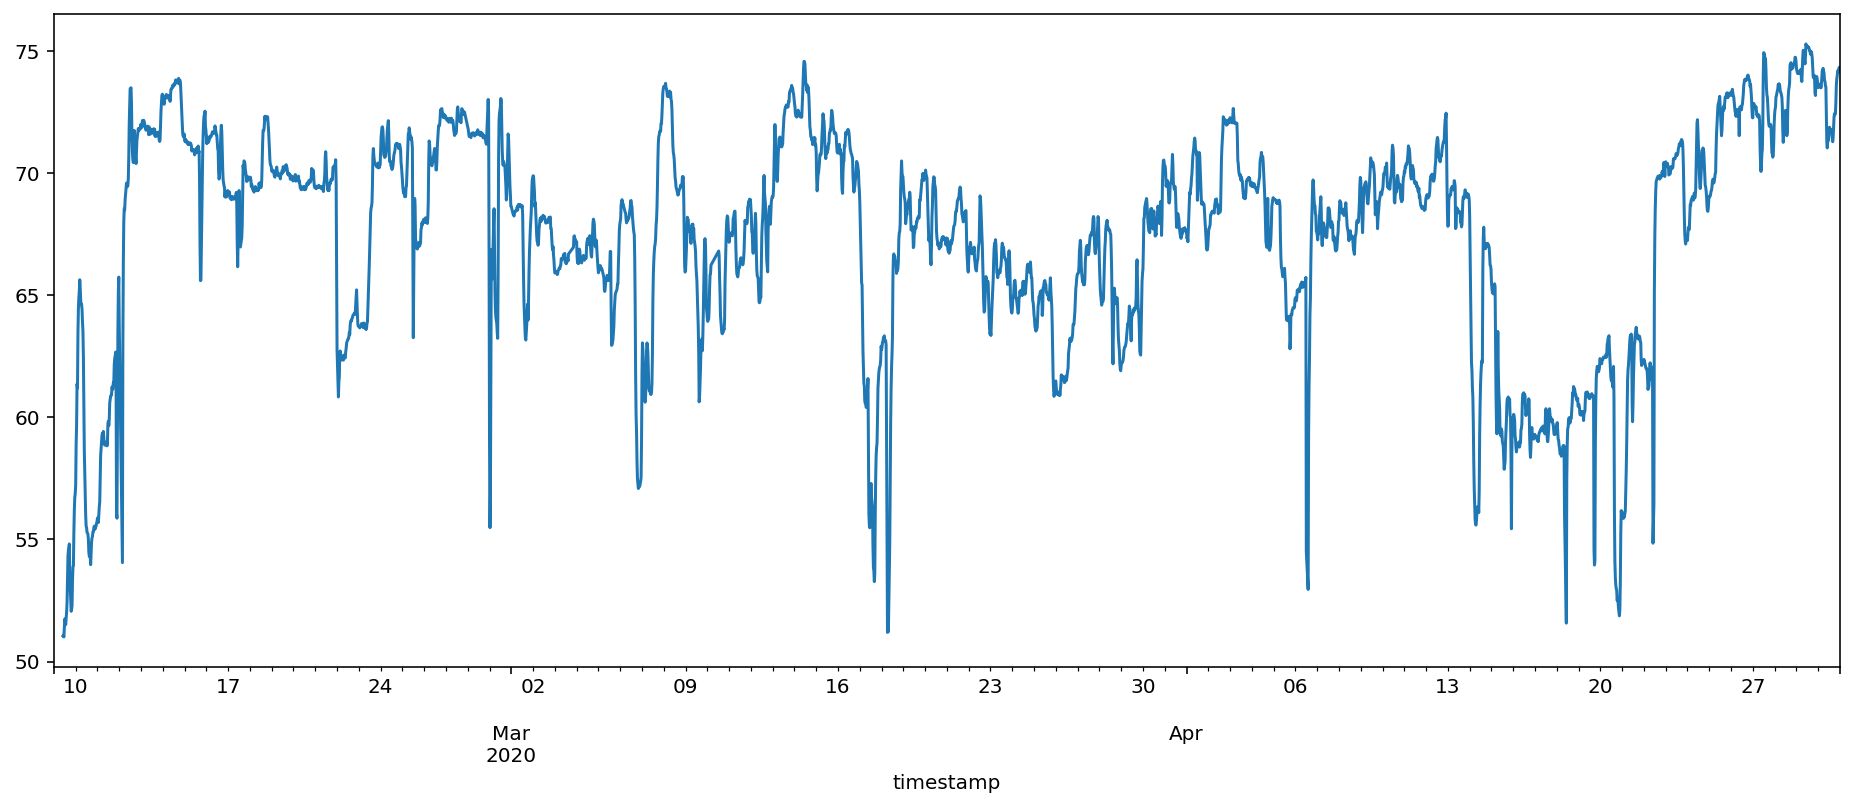

In [189]:
feb['B_rate'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

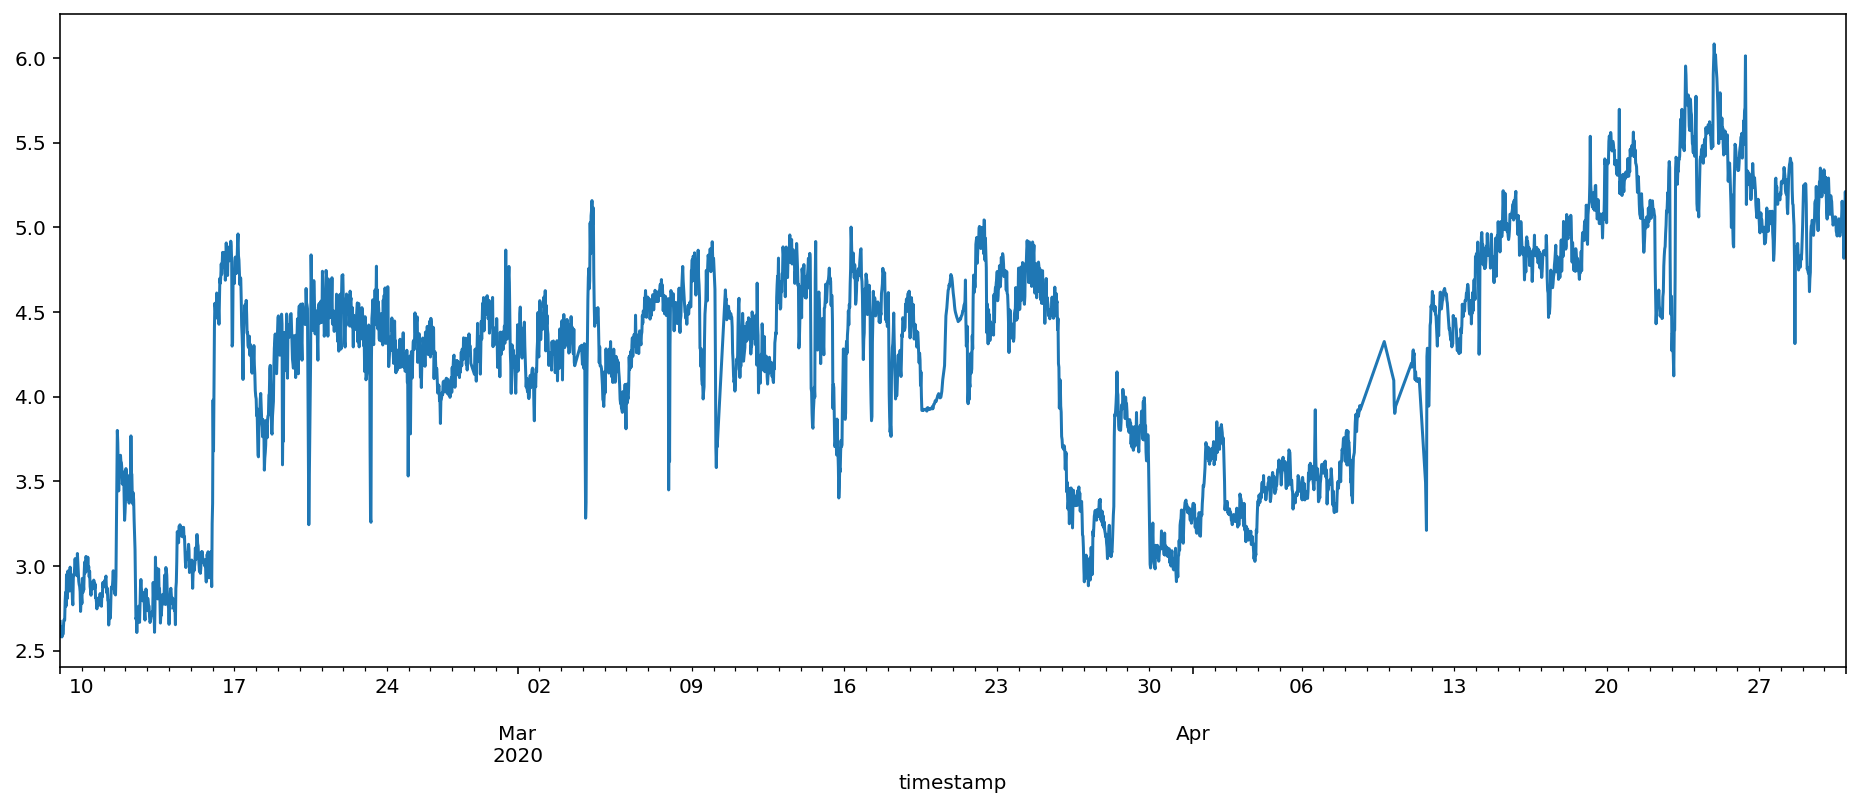

In [190]:
feb['B_C2H6'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

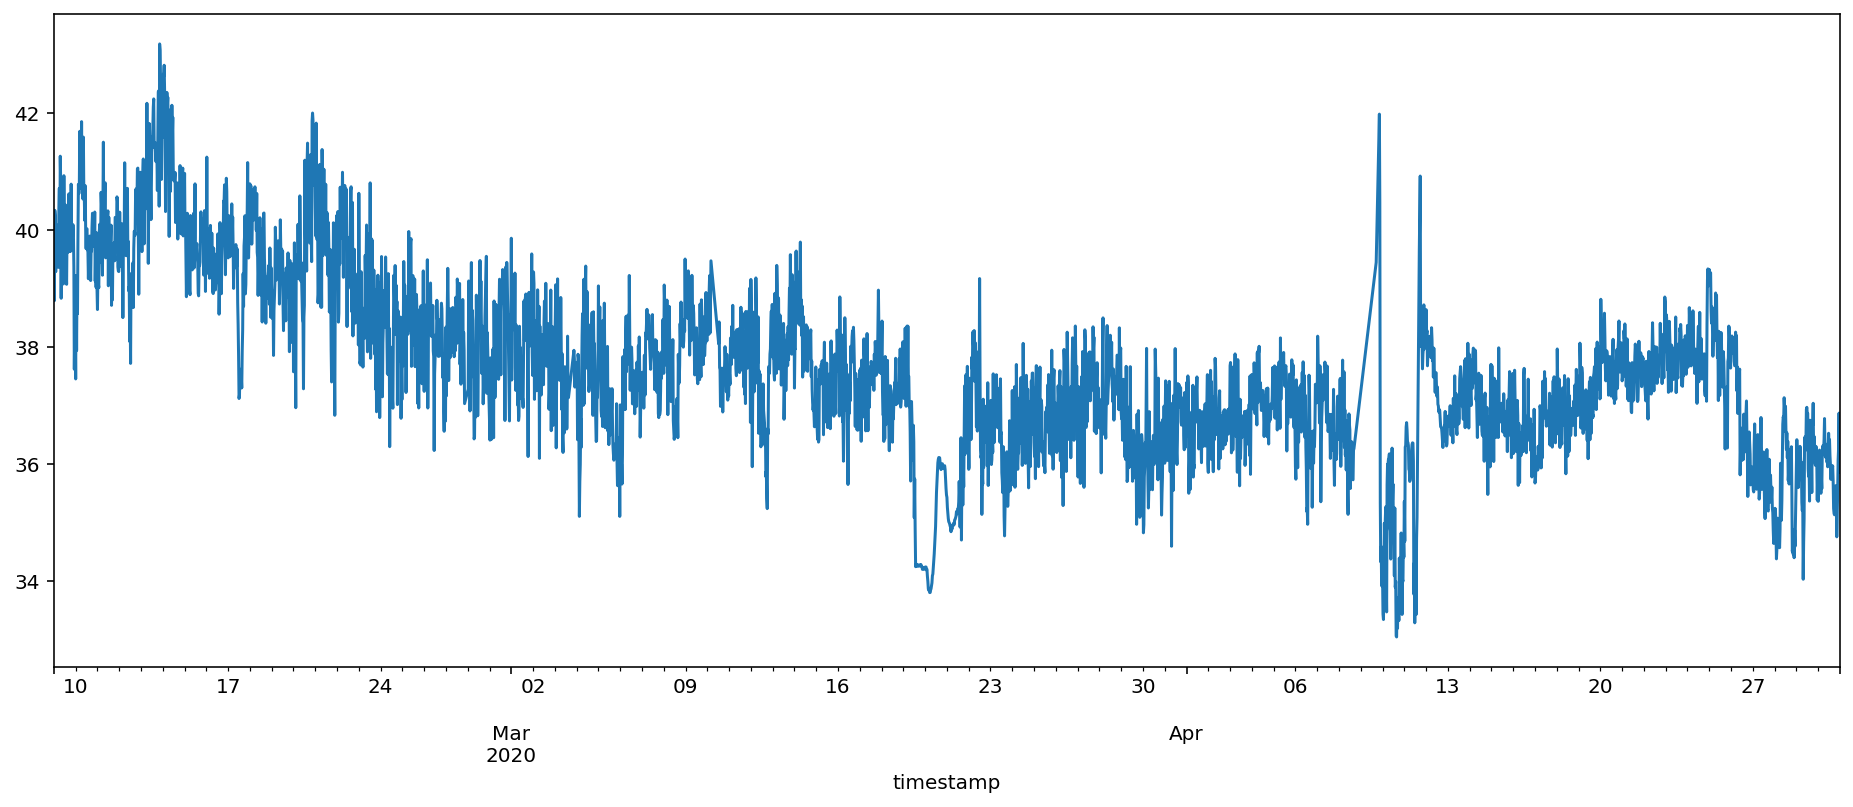

In [191]:
feb['B_C3H8'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

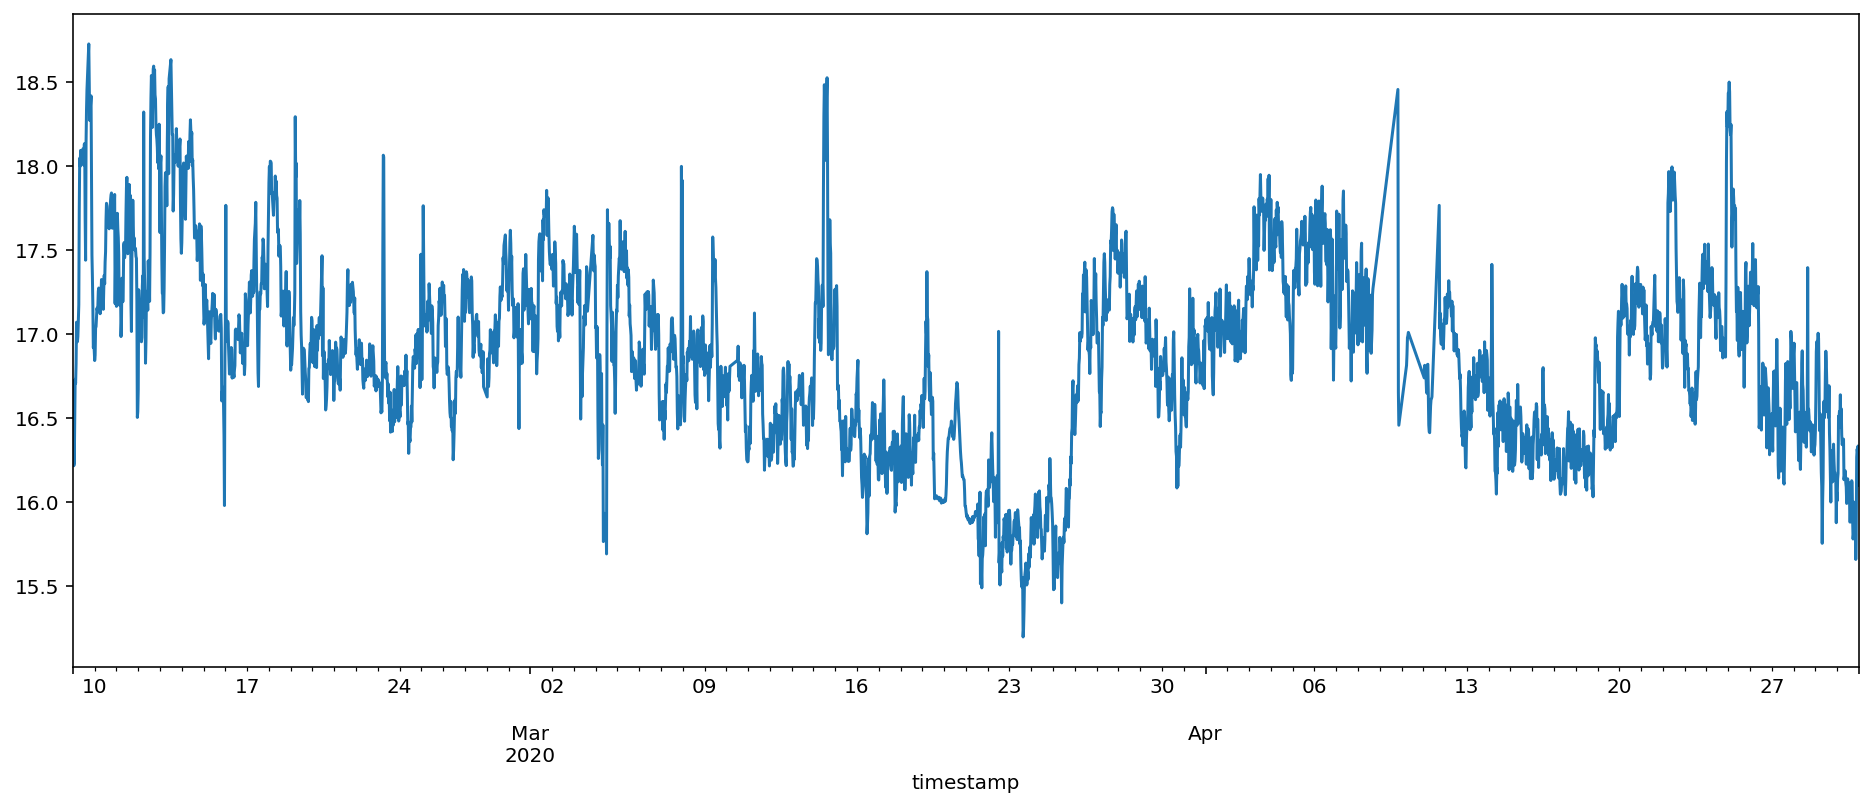

In [192]:
feb['B_iC4H10'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

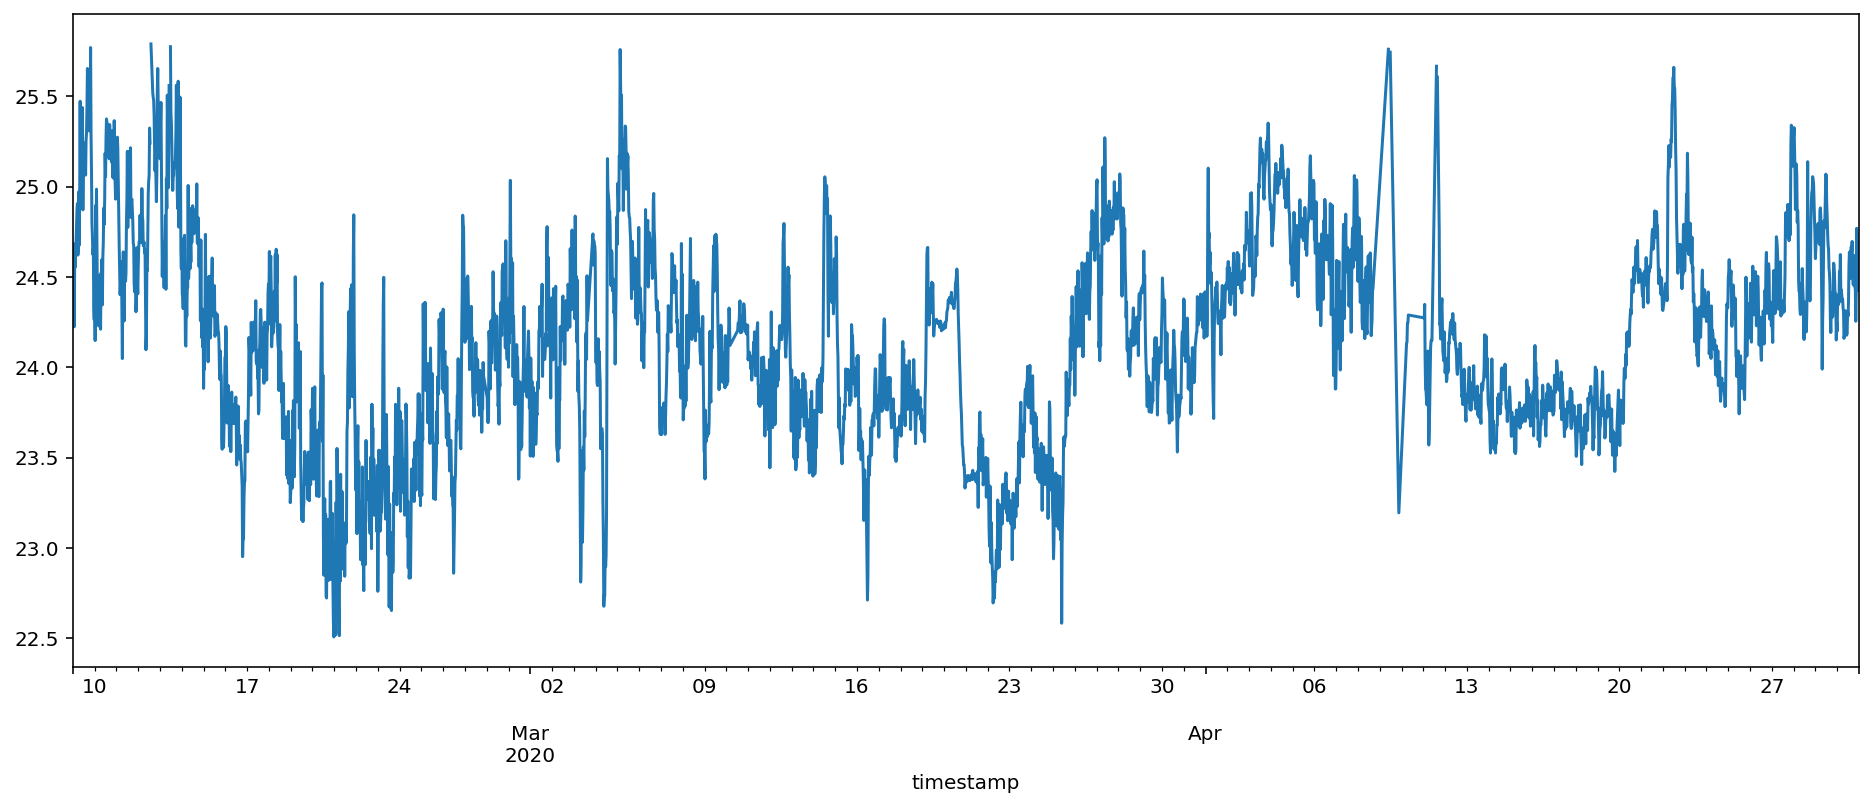

In [203]:
feb['B_nC4H10'].plot(figsize=(16, 6))

In [24]:
feb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3936 entries, 2020-02-09 00:00:00 to 2020-04-30 23:30:00
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   A_rate    3906 non-null   float64
 1   A_CH4     3936 non-null   float64
 2   A_C2H6    3936 non-null   float64
 3   A_C3H8    3936 non-null   float64
 4   A_iC4H10  3936 non-null   float64
 5   A_nC4H10  3936 non-null   float64
 6   A_iC5H12  3936 non-null   float64
 7   A_nC5H12  3936 non-null   float64
 8   A_C6H14   3895 non-null   float64
 9   B_rate    3936 non-null   float64
 10  B_C2H6    3936 non-null   float64
 11  B_C3H8    3936 non-null   float64
 12  B_iC4H10  3936 non-null   float64
 13  B_nC4H10  3936 non-null   float64
dtypes: float64(14)
memory usage: 461.2 KB


In [25]:
feb['A_CH4'].fillna(feb['A_CH4'].median(), inplace=True)
feb['A_C2H6'].fillna(feb['A_C2H6'].median(), inplace=True)
feb['A_C3H8'].fillna(feb['A_C3H8'].median(), inplace=True)
feb['A_iC4H10'].fillna(feb['A_iC4H10'].median(), inplace=True)
feb['A_nC4H10'].fillna(feb['A_nC4H10'].median(), inplace=True)
feb['A_nC5H12'].fillna(feb['A_nC5H12'].median(), inplace=True)
feb['A_iC5H12'].fillna(feb['A_iC5H12'].median(), inplace=True)
feb['A_C6H14'].fillna(feb['A_C6H14'].median(), inplace=True)
feb['B_C2H6'].fillna(feb['B_C2H6'].median(), inplace=True)
feb['B_C3H8'].fillna(feb['B_C3H8'].median(), inplace=True)
feb['B_iC4H10'].fillna(feb['B_iC4H10'].median(), inplace=True)
feb['B_nC4H10'].fillna(feb['B_nC4H10'].median(), inplace=True)
feb['A_rate'].fillna(feb['A_rate'].mean(), inplace=True)
feb['B_rate'].fillna(feb['B_rate'].mean(), inplace=True)


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3984 entries, 2020-05-01 00:00:00 to 2020-07-22 23:30:00
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   A_rate    2842 non-null   float64
 1   A_CH4     3528 non-null   float64
 2   A_C2H6    3533 non-null   float64
 3   A_C3H8    3532 non-null   float64
 4   A_iC4H10  3532 non-null   float64
 5   A_nC4H10  3532 non-null   float64
 6   A_iC5H12  3528 non-null   float64
 7   A_nC5H12  3528 non-null   float64
 8   A_C6H14   3529 non-null   float64
 9   B_rate    3979 non-null   float64
dtypes: float64(10)
memory usage: 342.4 KB


In [469]:
test.describe()

A_rate        A_CH4       A_C2H6       A_C3H8     A_iC4H10  \
count  2816.000000  3517.000000  3477.000000  3465.000000  3480.000000   
mean     70.051770     0.162330     4.493259    39.155483    17.380198   
std       1.909951     0.051055     0.385313     1.361693     0.670207   
min      61.439079     0.084754     3.603494    35.438803    15.828277   
25%      69.194661     0.126594     4.249902    38.425970    16.857121   
50%      70.159151     0.147864     4.471288    39.069757    17.273368   
75%      71.297572     0.173949     4.735459    40.298340    18.060046   
max      74.346769     0.348252     5.474893    41.988437    18.595153   

          A_nC4H10     A_iC5H12     A_nC5H12      A_C6H14       B_rate  
count  3490.000000  3469.000000  3333.000000  3508.000000  3857.000000  
mean     23.919636     4.869041     4.488222     5.520780    72.691690  
std       0.423179     0.568254     0.564801     0.947239     1.475518  
min      23.006020     3.931211     3.601349     0.000000    68.132754  
25%      23.584649     4.387161     3.881947     4.742783    71.759801  
50%      23.901281     4.779152     4.605488     5.940244    72.659521  
75%      24.258819     5.192084     4.927289     6.124897    73.841687  
max      25.102183     6.398289     5.899739     8.196776    75.973843

### Также смотрел по очереди на все графики и обрезал их в ручную диапазонами значений 

### Для примера 1 график до, и после 

<AxesSubplot:xlabel='timestamp'>

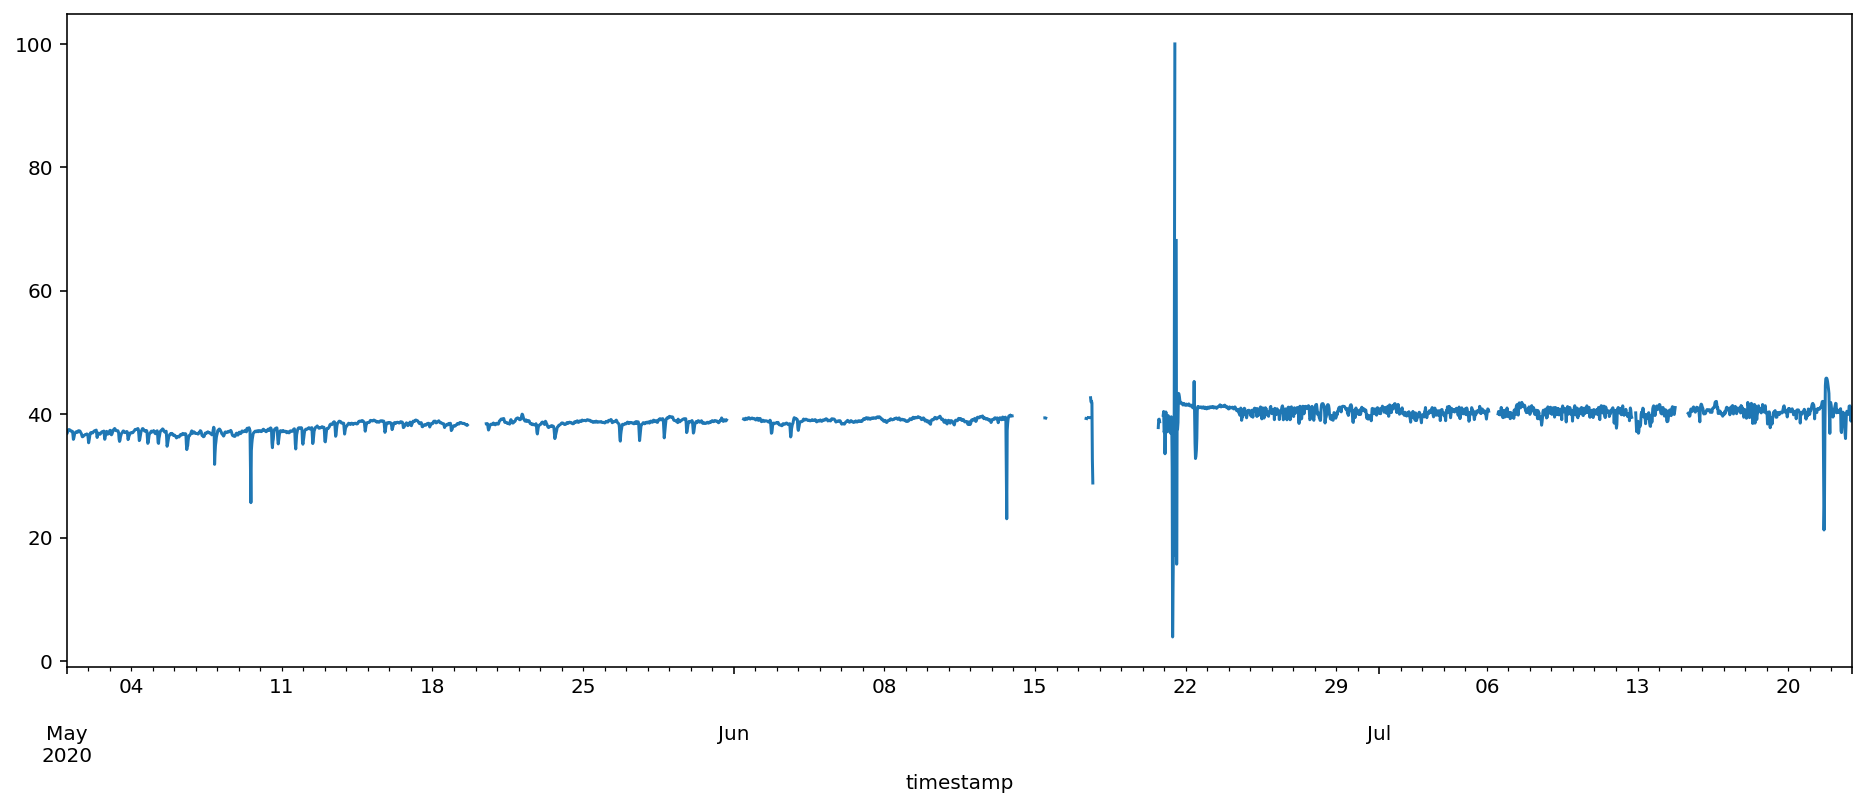

In [27]:
test['A_C3H8'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

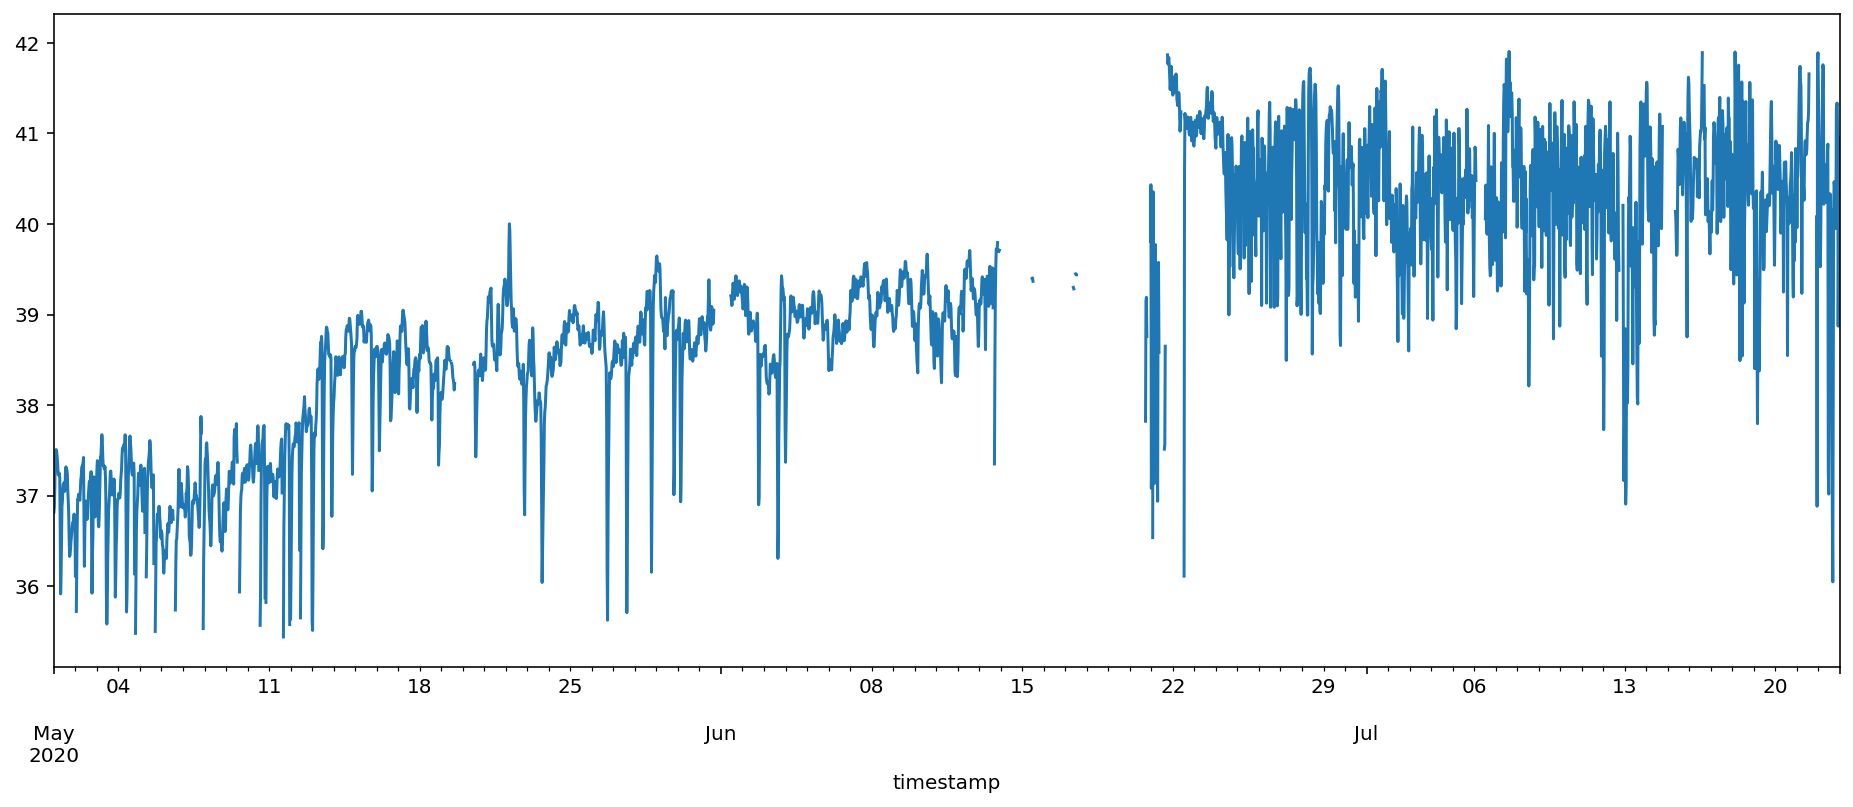

In [29]:
test['A_C3H8'].plot(figsize=(16, 6))

In [32]:
test.loc[test['A_rate'] < 61.4, 'A_rate'] = np.NaN
test.loc[test['A_CH4'] > 0.35, 'A_CH4'] = np.NaN
test.loc[test['A_CH4'] < 0.08, 'A_CH4'] = np.NaN
test.loc[test['A_C2H6'] < 3.6025, 'A_C2H6'] = np.NaN
test.loc[test['A_C2H6'] > 5.5, 'A_C2H6'] = np.NaN
test.loc[test['A_C3H8'] > 42, 'A_C3H8'] = np.NaN
test.loc[test['A_C3H8'] < 35.4, 'A_C3H8'] = np.NaN
test.loc[test['A_iC4H10'] > 18.6, 'A_iC4H10'] = np.NaN
test.loc[test['A_iC4H10'] < 15.8, 'A_iC4H10'] = np.NaN
test.loc[test['A_nC4H10'] > 25.15, 'A_nC4H10'] = np.NaN
test.loc[test['A_nC4H10'] < 23, 'A_nC4H10'] = np.NaN
test.loc[test['A_iC5H12'] > 6.4, 'A_iC5H12'] = np.NaN
test.loc[test['A_iC5H12'] < 3.93, 'A_iC5H12'] = np.NaN
test.loc[test['A_nC5H12'] > 5.9, 'A_nC5H12'] = np.NaN
test.loc[test['A_nC5H12'] < 3.6, 'A_nC5H12'] = np.NaN
test.loc[test['A_C6H14'] > 8.3, 'A_C6H14'] = np.NaN
test.loc[test['B_rate'] > 78, 'B_rate'] = np.NaN
test.loc[test['B_rate'] < 68.6, 'B_rate'] = np.NaN

## По очереди накладывал графики колонок из тренировочного датасета и тестового

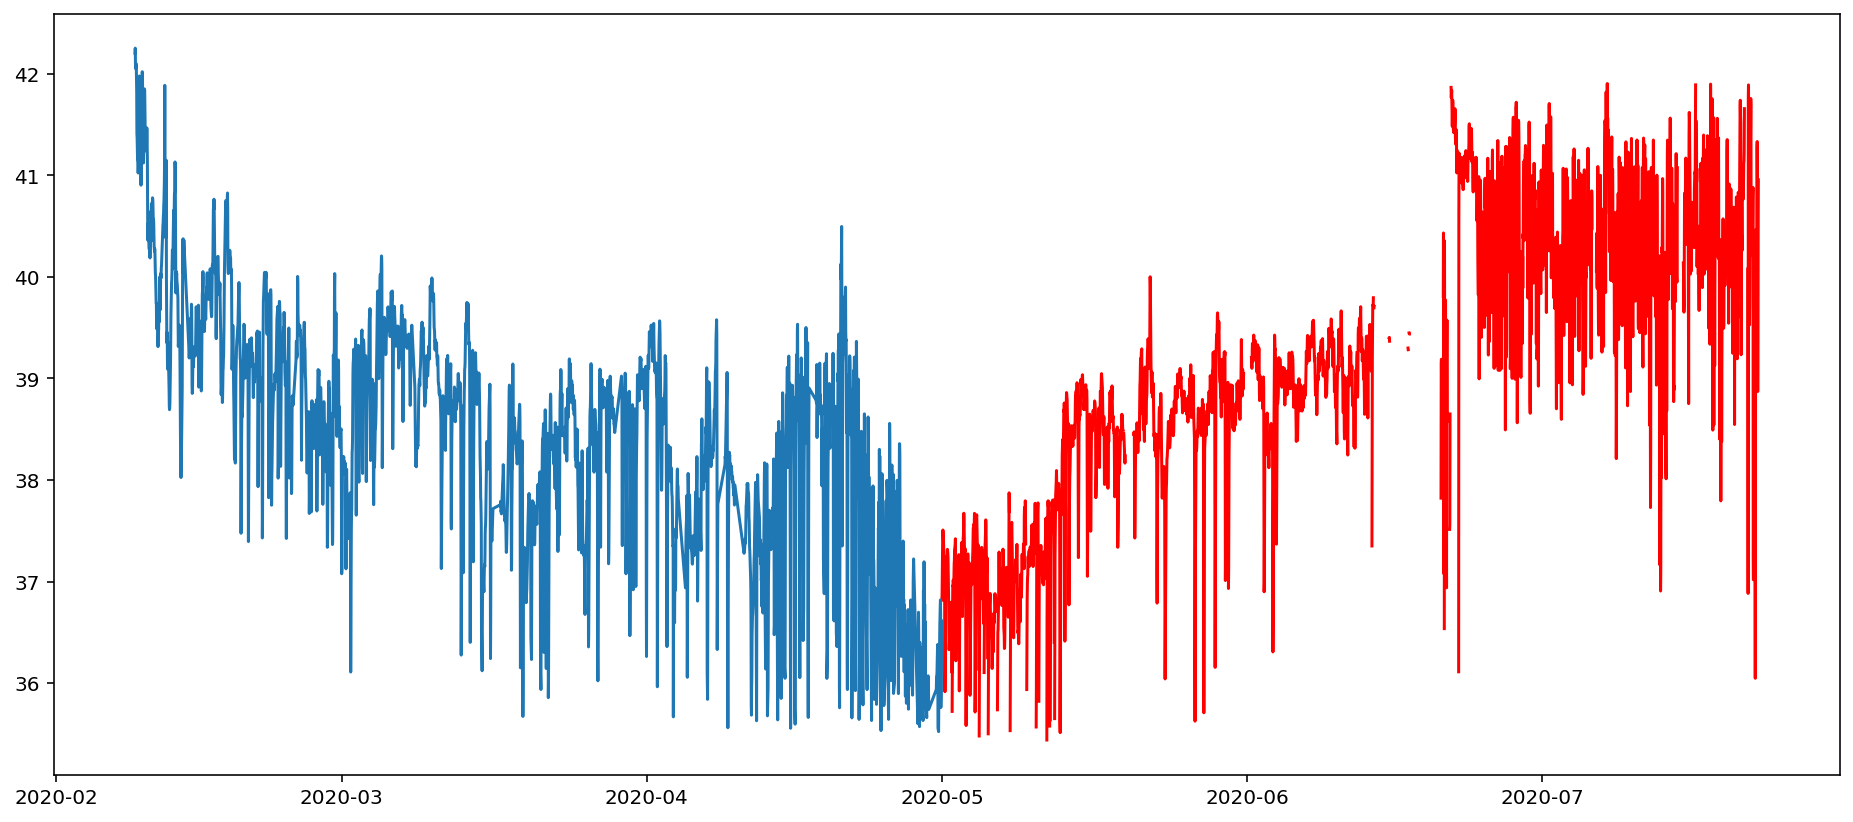

In [30]:
#test['A_rate'].plot(figsize=(16, 6))
plt.figure(figsize=(16, 7))
plt.plot(test['A_C3H8'], color='r', label="test",)
#plt.title("SARIMA model\n Mean absolute error {} users".format(round(mean_absolute_error(data.dropna().B_C2H6, data.dropna().arima_model))))
plt.plot(feb['A_C3H8'], label="train",)

<AxesSubplot:xlabel='timestamp'>

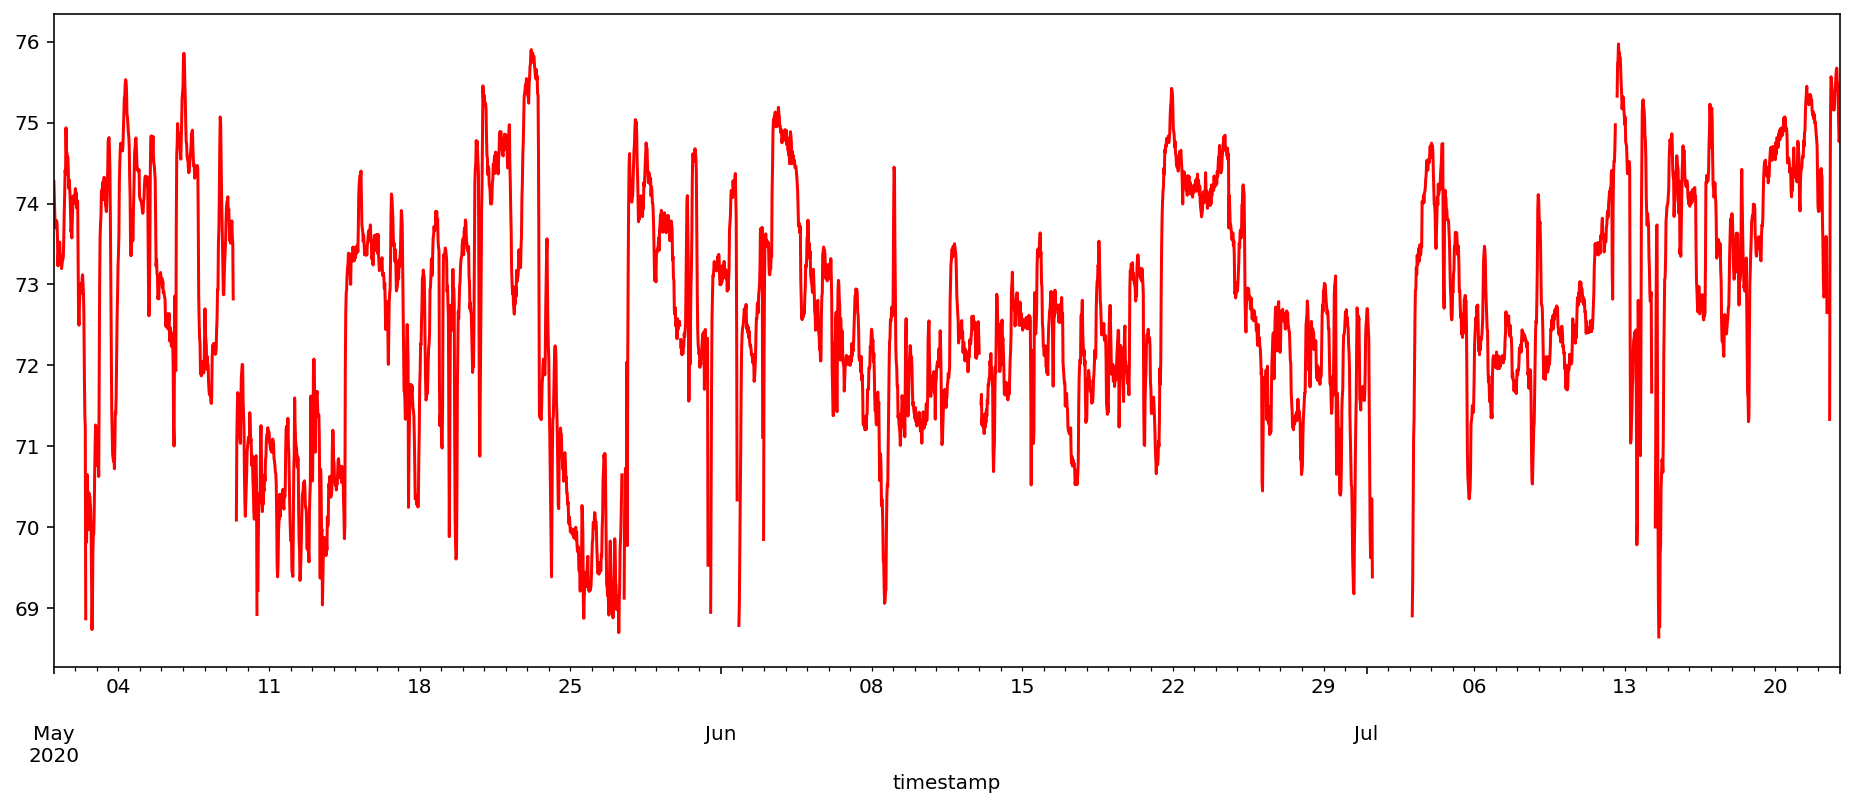

In [33]:
test['B_rate'].plot(figsize=(16, 6), color='r')

In [34]:
test.describe()

A_rate        A_CH4       A_C2H6       A_C3H8     A_iC4H10  \
count  2816.000000  3517.000000  3477.000000  3465.000000  3480.000000   
mean     70.051770     0.162330     4.493259    39.155483    17.380198   
std       1.909951     0.051055     0.385313     1.361693     0.670207   
min      61.439079     0.084754     3.603494    35.438803    15.828277   
25%      69.194661     0.126594     4.249902    38.425970    16.857121   
50%      70.159151     0.147864     4.471288    39.069757    17.273368   
75%      71.297572     0.173949     4.735459    40.298340    18.060046   
max      74.346769     0.348252     5.474894    41.988437    18.595153   

          A_nC4H10     A_iC5H12     A_nC5H12      A_C6H14       B_rate  
count  3490.000000  3469.000000  3333.000000  3508.000000  3851.000000  
mean     23.919636     4.869041     4.488222     5.520780    72.698357  
std       0.423179     0.568254     0.564801     0.947239     1.466945  
min      23.006020     3.931211     3.601349     0.000000    68.641804  
25%      23.584649     4.387161     3.881947     4.742783    71.764601  
50%      23.901281     4.779152     4.605488     5.940244    72.663457  
75%      24.258819     5.192084     4.927289     6.124897    73.849226  
max      25.102183     6.398289     5.899739     8.196776    75.973843

### Дальше я смотрел на средние значения колонок в трейне и тесте, чтобы они не сильно отличались

In [35]:
print(feb['A_rate'].mean())
print(test['A_rate'].mean())

65.85615952145588
70.05177035652092


In [36]:
print(feb['A_CH4'].mean())
print(test['A_CH4'].mean())

0.17907947645510078
0.16232969923467697


In [37]:
print(feb['A_C2H6'].mean())
print(test['A_C2H6'].mean())

4.449284165299689
4.493258847962453


In [38]:
print(feb['A_C3H8'].mean())
print(test['A_C3H8'].mean())

38.428153632125245
39.15548269115997


In [39]:
print(feb['A_iC4H10'].mean())
print(test['A_iC4H10'].mean())

17.262486022243063
17.380197915797762


In [40]:
print(feb['A_nC4H10'].mean())
print(test['A_nC4H10'].mean())

24.10263147577391
23.919635888449996


In [41]:
print(feb['A_iC5H12'].mean())
print(test['A_iC5H12'].mean())

4.917325151584497
4.869041343822494


In [42]:
print(feb['A_nC5H12'].mean())
print(test['A_nC5H12'].mean())

4.747384928380797
4.488221673835961


In [43]:
print(feb['A_C6H14'].mean())
print(test['A_C6H14'].mean())

5.938872308473951
5.520780252446783


In [44]:
print(feb['B_rate'].mean())
print(test['B_rate'].mean())

67.9173433703269
72.69835661584145


In [45]:
test['A_CH4'].fillna(feb['A_CH4'].mean(), inplace=True)
test['A_C2H6'].fillna(feb['A_C2H6'].mean(), inplace=True)
test['A_C3H8'].fillna(feb['A_C3H8'].mean(), inplace=True)
test['A_iC4H10'].fillna(feb['A_iC4H10'].mean(), inplace=True)
test['A_nC4H10'].fillna(feb['A_nC4H10'].mean(), inplace=True)
test['A_nC5H12'].fillna(feb['A_nC5H12'].mean(), inplace=True)
test['A_iC5H12'].fillna(feb['A_iC5H12'].mean(), inplace=True)
test['A_C6H14'].fillna(feb['A_C6H14'].mean(), inplace=True)
test['A_rate'].fillna(feb['A_rate'].mean(), inplace=True)
test['B_rate'].fillna(feb['B_rate'].mean(), inplace=True)

In [46]:
B_C2H6 = feb['B_C2H6']
B_C3H8 = feb['B_C3H8']
B_iC4H10 = feb['B_iC4H10']
B_nC4H10 = feb['B_nC4H10']

In [47]:
feb.drop(['B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10'], axis=1, inplace=True)
feb

A_rate     A_CH4    A_C2H6     A_C3H8   A_iC4H10  \
timestamp                                                                  
2020-02-09 00:00:00  65.856160  0.144524  2.737562  42.203553  18.395980   
2020-02-09 00:30:00  65.856160  0.153580  2.732064  42.253690  18.189257   
2020-02-09 01:00:00  65.856160  0.157296  2.726765  42.091440  18.040847   
2020-02-09 01:30:00  65.856160  0.146211  2.728743  42.052320  18.102822   
2020-02-09 02:00:00  65.856160  0.130078  2.705980  42.054647  18.288487   
...                        ...       ...       ...        ...        ...   
2020-04-30 21:30:00  72.009730  0.284151  4.936343  35.758852  16.473834   
2020-04-30 22:00:00  71.854180  0.282501  4.960453  35.877193  16.448487   
2020-04-30 22:30:00  71.783273  0.277686  5.013878  36.271557  16.500147   
2020-04-30 23:00:00  71.717743  0.271105  5.080144  36.616673  16.559533   
2020-04-30 23:30:00  71.730325  0.265635  5.069165  36.602453  16.649167   

                      A_nC4H10  A_iC5H12  A_nC5H12   A_C6H14     B_rate  
timestamp                                                                
2020-02-09 00:00:00  25.116770  4.265102  3.696698  5.786414  67.917343  
2020-02-09 00:30:00  25.016380  4.318525  3.783097  5.786414  67.917343  
2020-02-09 01:00:00  24.992053  4.407098  3.908029  5.786414  67.917343  
2020-02-09 01:30:00  25.027353  4.415327  3.885792  5.786414  67.917343  
2020-02-09 02:00:00  25.119287  4.391632  3.790096  5.786414  67.917343  
...                        ...       ...       ...       ...        ...  
2020-04-30 21:30:00  24.318968  6.069360  5.527463  6.577563  74.183355  
2020-04-30 22:00:00  24.074193  5.981357  5.407256  6.915378  74.213066  
2020-04-30 22:30:00  24.010123  5.829363  5.160329  6.884173  74.144367  
2020-04-30 23:00:00  24.008848  5.750492  5.017941  6.642076  74.320575  
2020-04-30 23:30:00  24.150503  5.752792  4.997528  6.459137  74.327170  

[3936 rows x 10 columns]

### Здесь вообще я перебирал параметры, но из-за среднего результата в итоге, и не знания подходов к анализу временных рядов опустил этот момент. Поэтому создаю простой регрессор и делаю предсказания. 

In [49]:
from catboost import CatBoostRegressor

In [50]:
cbr_B_C2H6 = CatBoostRegressor(loss_function='MAE', iterations=500)
cbr_B_C2H6.fit(feb, B_C2H6)

cbr_B_C3H8 = CatBoostRegressor(loss_function='MAE', iterations=500)
cbr_B_C3H8.fit(feb, B_C3H8)

cbr_B_iC4H10 = CatBoostRegressor(loss_function='MAE', iterations=500)
cbr_B_iC4H10.fit(feb, B_iC4H10)

cbr_B_nC4H10 = CatBoostRegressor(loss_function='MAE', iterations=500)
cbr_B_nC4H10.fit(feb, B_nC4H10)

0:	learn: 0.5408760	total: 230ms	remaining: 1m 55s
1:	learn: 0.5314613	total: 239ms	remaining: 59.6s
2:	learn: 0.5219987	total: 248ms	remaining: 41.1s
3:	learn: 0.5131042	total: 256ms	remaining: 31.8s
4:	learn: 0.5044727	total: 261ms	remaining: 25.8s
5:	learn: 0.4970147	total: 265ms	remaining: 21.8s
6:	learn: 0.4894034	total: 268ms	remaining: 18.9s
7:	learn: 0.4811734	total: 272ms	remaining: 16.7s
8:	learn: 0.4735032	total: 276ms	remaining: 15s
9:	learn: 0.4665371	total: 280ms	remaining: 13.7s
10:	learn: 0.4595635	total: 283ms	remaining: 12.6s
11:	learn: 0.4522933	total: 287ms	remaining: 11.7s
12:	learn: 0.4455327	total: 290ms	remaining: 10.9s
13:	learn: 0.4395510	total: 293ms	remaining: 10.2s
14:	learn: 0.4329263	total: 297ms	remaining: 9.59s
15:	learn: 0.4270425	total: 300ms	remaining: 9.07s
16:	learn: 0.4212236	total: 303ms	remaining: 8.62s
17:	learn: 0.4158912	total: 307ms	remaining: 8.21s
18:	learn: 0.4110979	total: 310ms	remaining: 7.85s
19:	learn: 0.4055711	total: 313ms	remainin

222:	learn: 0.1965766	total: 937ms	remaining: 1.16s
223:	learn: 0.1964389	total: 940ms	remaining: 1.16s
224:	learn: 0.1962175	total: 943ms	remaining: 1.15s
225:	learn: 0.1960551	total: 946ms	remaining: 1.15s
226:	learn: 0.1959290	total: 949ms	remaining: 1.14s
227:	learn: 0.1955783	total: 952ms	remaining: 1.14s
228:	learn: 0.1953873	total: 955ms	remaining: 1.13s
229:	learn: 0.1950699	total: 958ms	remaining: 1.12s
230:	learn: 0.1949513	total: 960ms	remaining: 1.12s
231:	learn: 0.1946317	total: 963ms	remaining: 1.11s
232:	learn: 0.1944980	total: 967ms	remaining: 1.11s
233:	learn: 0.1942857	total: 970ms	remaining: 1.1s
234:	learn: 0.1940962	total: 973ms	remaining: 1.1s
235:	learn: 0.1939800	total: 976ms	remaining: 1.09s
236:	learn: 0.1936136	total: 979ms	remaining: 1.08s
237:	learn: 0.1933745	total: 981ms	remaining: 1.08s
238:	learn: 0.1931252	total: 984ms	remaining: 1.07s
239:	learn: 0.1928670	total: 987ms	remaining: 1.07s
240:	learn: 0.1926029	total: 990ms	remaining: 1.06s
241:	learn: 0.

410:	learn: 0.1664201	total: 1.47s	remaining: 319ms
411:	learn: 0.1662032	total: 1.48s	remaining: 315ms
412:	learn: 0.1660812	total: 1.48s	remaining: 312ms
413:	learn: 0.1658395	total: 1.48s	remaining: 308ms
414:	learn: 0.1657759	total: 1.49s	remaining: 304ms
415:	learn: 0.1656250	total: 1.49s	remaining: 300ms
416:	learn: 0.1654735	total: 1.49s	remaining: 297ms
417:	learn: 0.1652369	total: 1.49s	remaining: 293ms
418:	learn: 0.1651751	total: 1.5s	remaining: 289ms
419:	learn: 0.1651103	total: 1.5s	remaining: 286ms
420:	learn: 0.1650056	total: 1.5s	remaining: 282ms
421:	learn: 0.1648671	total: 1.5s	remaining: 278ms
422:	learn: 0.1647012	total: 1.51s	remaining: 275ms
423:	learn: 0.1646024	total: 1.51s	remaining: 271ms
424:	learn: 0.1645063	total: 1.51s	remaining: 267ms
425:	learn: 0.1643284	total: 1.52s	remaining: 263ms
426:	learn: 0.1641903	total: 1.52s	remaining: 260ms
427:	learn: 0.1639426	total: 1.52s	remaining: 256ms
428:	learn: 0.1638087	total: 1.52s	remaining: 252ms
429:	learn: 0.16

83:	learn: 0.6746919	total: 246ms	remaining: 1.22s
84:	learn: 0.6733560	total: 249ms	remaining: 1.22s
85:	learn: 0.6718455	total: 252ms	remaining: 1.21s
86:	learn: 0.6705241	total: 255ms	remaining: 1.21s
87:	learn: 0.6695948	total: 258ms	remaining: 1.21s
88:	learn: 0.6680951	total: 261ms	remaining: 1.2s
89:	learn: 0.6666891	total: 264ms	remaining: 1.2s
90:	learn: 0.6656684	total: 267ms	remaining: 1.2s
91:	learn: 0.6640919	total: 270ms	remaining: 1.2s
92:	learn: 0.6626774	total: 273ms	remaining: 1.19s
93:	learn: 0.6619965	total: 275ms	remaining: 1.19s
94:	learn: 0.6603412	total: 278ms	remaining: 1.19s
95:	learn: 0.6596214	total: 281ms	remaining: 1.18s
96:	learn: 0.6585030	total: 284ms	remaining: 1.18s
97:	learn: 0.6573543	total: 287ms	remaining: 1.18s
98:	learn: 0.6558030	total: 290ms	remaining: 1.17s
99:	learn: 0.6545159	total: 293ms	remaining: 1.17s
100:	learn: 0.6535489	total: 296ms	remaining: 1.17s
101:	learn: 0.6526494	total: 298ms	remaining: 1.16s
102:	learn: 0.6516998	total: 301m

269:	learn: 0.5617619	total: 787ms	remaining: 671ms
270:	learn: 0.5613915	total: 790ms	remaining: 668ms
271:	learn: 0.5606780	total: 793ms	remaining: 665ms
272:	learn: 0.5602813	total: 796ms	remaining: 662ms
273:	learn: 0.5595629	total: 799ms	remaining: 659ms
274:	learn: 0.5591315	total: 802ms	remaining: 656ms
275:	learn: 0.5587671	total: 805ms	remaining: 653ms
276:	learn: 0.5585109	total: 808ms	remaining: 650ms
277:	learn: 0.5581232	total: 811ms	remaining: 648ms
278:	learn: 0.5576964	total: 814ms	remaining: 645ms
279:	learn: 0.5573751	total: 817ms	remaining: 642ms
280:	learn: 0.5571600	total: 820ms	remaining: 639ms
281:	learn: 0.5569642	total: 823ms	remaining: 636ms
282:	learn: 0.5567030	total: 825ms	remaining: 633ms
283:	learn: 0.5561960	total: 828ms	remaining: 630ms
284:	learn: 0.5557927	total: 831ms	remaining: 627ms
285:	learn: 0.5552801	total: 834ms	remaining: 624ms
286:	learn: 0.5546604	total: 837ms	remaining: 621ms
287:	learn: 0.5543531	total: 840ms	remaining: 618ms
288:	learn: 

456:	learn: 0.4954144	total: 1.32s	remaining: 125ms
457:	learn: 0.4950620	total: 1.33s	remaining: 122ms
458:	learn: 0.4945928	total: 1.33s	remaining: 119ms
459:	learn: 0.4942968	total: 1.33s	remaining: 116ms
460:	learn: 0.4937146	total: 1.34s	remaining: 113ms
461:	learn: 0.4935362	total: 1.34s	remaining: 110ms
462:	learn: 0.4930155	total: 1.34s	remaining: 107ms
463:	learn: 0.4926612	total: 1.35s	remaining: 105ms
464:	learn: 0.4924775	total: 1.35s	remaining: 102ms
465:	learn: 0.4922959	total: 1.35s	remaining: 98.7ms
466:	learn: 0.4918646	total: 1.35s	remaining: 95.8ms
467:	learn: 0.4917090	total: 1.36s	remaining: 92.9ms
468:	learn: 0.4913461	total: 1.36s	remaining: 90ms
469:	learn: 0.4911524	total: 1.36s	remaining: 87.1ms
470:	learn: 0.4908687	total: 1.37s	remaining: 84.2ms
471:	learn: 0.4907719	total: 1.37s	remaining: 81.3ms
472:	learn: 0.4905544	total: 1.37s	remaining: 78.4ms
473:	learn: 0.4903286	total: 1.38s	remaining: 75.5ms
474:	learn: 0.4899971	total: 1.38s	remaining: 72.6ms
475:

135:	learn: 0.2420999	total: 389ms	remaining: 1.04s
136:	learn: 0.2418324	total: 392ms	remaining: 1.04s
137:	learn: 0.2411921	total: 395ms	remaining: 1.04s
138:	learn: 0.2409326	total: 398ms	remaining: 1.03s
139:	learn: 0.2403480	total: 401ms	remaining: 1.03s
140:	learn: 0.2401273	total: 404ms	remaining: 1.03s
141:	learn: 0.2398310	total: 406ms	remaining: 1.02s
142:	learn: 0.2391979	total: 409ms	remaining: 1.02s
143:	learn: 0.2388932	total: 412ms	remaining: 1.02s
144:	learn: 0.2383250	total: 415ms	remaining: 1.02s
145:	learn: 0.2379980	total: 418ms	remaining: 1.01s
146:	learn: 0.2376210	total: 421ms	remaining: 1.01s
147:	learn: 0.2372180	total: 424ms	remaining: 1.01s
148:	learn: 0.2366840	total: 426ms	remaining: 1s
149:	learn: 0.2363069	total: 429ms	remaining: 1s
150:	learn: 0.2360679	total: 432ms	remaining: 998ms
151:	learn: 0.2356079	total: 435ms	remaining: 996ms
152:	learn: 0.2354033	total: 438ms	remaining: 992ms
153:	learn: 0.2350048	total: 440ms	remaining: 990ms
154:	learn: 0.2346

324:	learn: 0.1978817	total: 928ms	remaining: 500ms
325:	learn: 0.1977262	total: 931ms	remaining: 497ms
326:	learn: 0.1975302	total: 934ms	remaining: 494ms
327:	learn: 0.1973751	total: 937ms	remaining: 491ms
328:	learn: 0.1970470	total: 940ms	remaining: 488ms
329:	learn: 0.1968548	total: 942ms	remaining: 485ms
330:	learn: 0.1966606	total: 945ms	remaining: 483ms
331:	learn: 0.1965753	total: 948ms	remaining: 480ms
332:	learn: 0.1964244	total: 951ms	remaining: 477ms
333:	learn: 0.1963663	total: 954ms	remaining: 474ms
334:	learn: 0.1961938	total: 957ms	remaining: 471ms
335:	learn: 0.1960906	total: 960ms	remaining: 468ms
336:	learn: 0.1959164	total: 962ms	remaining: 466ms
337:	learn: 0.1957926	total: 965ms	remaining: 463ms
338:	learn: 0.1956182	total: 968ms	remaining: 460ms
339:	learn: 0.1955369	total: 971ms	remaining: 457ms
340:	learn: 0.1954109	total: 973ms	remaining: 454ms
341:	learn: 0.1952066	total: 976ms	remaining: 451ms
342:	learn: 0.1950008	total: 979ms	remaining: 448ms
343:	learn: 

4:	learn: 0.4128707	total: 17.5ms	remaining: 1.74s
5:	learn: 0.4083659	total: 20.7ms	remaining: 1.7s
6:	learn: 0.4045180	total: 23.6ms	remaining: 1.66s
7:	learn: 0.4006619	total: 26.5ms	remaining: 1.63s
8:	learn: 0.3966916	total: 30.5ms	remaining: 1.67s
9:	learn: 0.3930466	total: 33.4ms	remaining: 1.64s
10:	learn: 0.3888573	total: 36.4ms	remaining: 1.62s
11:	learn: 0.3855712	total: 39.3ms	remaining: 1.6s
12:	learn: 0.3824840	total: 42.4ms	remaining: 1.59s
13:	learn: 0.3799690	total: 45.4ms	remaining: 1.57s
14:	learn: 0.3765556	total: 48.5ms	remaining: 1.57s
15:	learn: 0.3740734	total: 51.3ms	remaining: 1.55s
16:	learn: 0.3713945	total: 54.1ms	remaining: 1.54s
17:	learn: 0.3692830	total: 56.9ms	remaining: 1.52s
18:	learn: 0.3668674	total: 59.7ms	remaining: 1.51s
19:	learn: 0.3651532	total: 62.4ms	remaining: 1.5s
20:	learn: 0.3627508	total: 65.1ms	remaining: 1.49s
21:	learn: 0.3609358	total: 68ms	remaining: 1.48s
22:	learn: 0.3587075	total: 70.7ms	remaining: 1.47s
23:	learn: 0.3568456	to

192:	learn: 0.2343518	total: 556ms	remaining: 884ms
193:	learn: 0.2341258	total: 558ms	remaining: 881ms
194:	learn: 0.2337310	total: 561ms	remaining: 878ms
195:	learn: 0.2333406	total: 564ms	remaining: 875ms
196:	learn: 0.2331175	total: 567ms	remaining: 872ms
197:	learn: 0.2326945	total: 570ms	remaining: 869ms
198:	learn: 0.2325431	total: 572ms	remaining: 866ms
199:	learn: 0.2323344	total: 575ms	remaining: 863ms
200:	learn: 0.2321934	total: 578ms	remaining: 860ms
201:	learn: 0.2319928	total: 581ms	remaining: 857ms
202:	learn: 0.2317033	total: 584ms	remaining: 855ms
203:	learn: 0.2314546	total: 587ms	remaining: 852ms
204:	learn: 0.2313233	total: 590ms	remaining: 849ms
205:	learn: 0.2310999	total: 593ms	remaining: 846ms
206:	learn: 0.2308456	total: 595ms	remaining: 843ms
207:	learn: 0.2306346	total: 598ms	remaining: 840ms
208:	learn: 0.2303001	total: 601ms	remaining: 837ms
209:	learn: 0.2301492	total: 604ms	remaining: 834ms
210:	learn: 0.2298664	total: 607ms	remaining: 831ms
211:	learn: 

382:	learn: 0.1994690	total: 1.09s	remaining: 335ms
383:	learn: 0.1993531	total: 1.1s	remaining: 332ms
384:	learn: 0.1992510	total: 1.1s	remaining: 329ms
385:	learn: 0.1991163	total: 1.1s	remaining: 326ms
386:	learn: 0.1989962	total: 1.11s	remaining: 323ms
387:	learn: 0.1989013	total: 1.11s	remaining: 320ms
388:	learn: 0.1987826	total: 1.11s	remaining: 318ms
389:	learn: 0.1987089	total: 1.11s	remaining: 315ms
390:	learn: 0.1985730	total: 1.12s	remaining: 312ms
391:	learn: 0.1984023	total: 1.12s	remaining: 309ms
392:	learn: 0.1983303	total: 1.12s	remaining: 306ms
393:	learn: 0.1981523	total: 1.13s	remaining: 303ms
394:	learn: 0.1980252	total: 1.13s	remaining: 300ms
395:	learn: 0.1978906	total: 1.13s	remaining: 298ms
396:	learn: 0.1977456	total: 1.14s	remaining: 295ms
397:	learn: 0.1975872	total: 1.14s	remaining: 292ms
398:	learn: 0.1974646	total: 1.14s	remaining: 289ms
399:	learn: 0.1973547	total: 1.14s	remaining: 286ms
400:	learn: 0.1971895	total: 1.15s	remaining: 283ms
401:	learn: 0.1

In [51]:
cbr_B_C2H6_predict = cbr_B_C2H6.predict(test)

cbr_B_C3H8_predict = cbr_B_C3H8.predict(test)

cbr_B_iC4H10_predict = cbr_B_iC4H10.predict(test)

cbr_B_nC4H10_predict = cbr_B_nC4H10.predict(test)

In [52]:
cbr_B_C2H6_predict = pd.Series(cbr_B_C2H6_predict)
cbr_B_C3H8_predict = pd.Series(cbr_B_C3H8_predict)
cbr_B_iC4H10_predict = pd.Series(cbr_B_iC4H10_predict)
cbr_B_nC4H10_predict = pd.Series(cbr_B_nC4H10_predict)

### Далее привожу данные к нужному формату  и сохраняю файл для загрузки на платформу

In [53]:
sumb1 = pd.concat([cbr_B_C2H6_predict, cbr_B_C3H8_predict, cbr_B_iC4H10_predict, cbr_B_nC4H10_predict], axis=1, join='outer')

In [54]:
stam = sample1['timestamp']
stam = pd.concat([stam, sumb1], axis=1, join='outer')
stam

timestamp         0          1          2          3
0    2020-05-01 00:00:00  5.079499  35.978010  16.455503  24.524209
1    2020-05-01 00:30:00  5.087982  35.951791  16.469283  24.515480
2    2020-05-01 01:00:00  5.009373  36.111288  16.436262  24.485722
3    2020-05-01 01:30:00  5.141802  36.199271  16.435363  24.467291
4    2020-05-01 02:00:00  5.137409  36.187344  16.411208  24.462785
...                  ...       ...        ...        ...        ...
3979 2020-07-22 21:30:00  2.796482  41.545375  17.791787  24.806069
3980 2020-07-22 22:00:00  3.877285  39.162868  17.259531  24.236455
3981 2020-07-22 22:30:00  3.684041  40.413956  17.215801  24.615446
3982 2020-07-22 23:00:00  2.675084  41.635368  17.787145  24.786554
3983 2020-07-22 23:30:00  2.933047  41.083160  17.622184  24.793252

[3984 rows x 5 columns]

In [55]:
stam.columns = ['timestamp', 'B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10']

In [56]:
stam

timestamp    B_C2H6     B_C3H8   B_iC4H10   B_nC4H10
0    2020-05-01 00:00:00  5.079499  35.978010  16.455503  24.524209
1    2020-05-01 00:30:00  5.087982  35.951791  16.469283  24.515480
2    2020-05-01 01:00:00  5.009373  36.111288  16.436262  24.485722
3    2020-05-01 01:30:00  5.141802  36.199271  16.435363  24.467291
4    2020-05-01 02:00:00  5.137409  36.187344  16.411208  24.462785
...                  ...       ...        ...        ...        ...
3979 2020-07-22 21:30:00  2.796482  41.545375  17.791787  24.806069
3980 2020-07-22 22:00:00  3.877285  39.162868  17.259531  24.236455
3981 2020-07-22 22:30:00  3.684041  40.413956  17.215801  24.615446
3982 2020-07-22 23:00:00  2.675084  41.635368  17.787145  24.786554
3983 2020-07-22 23:30:00  2.933047  41.083160  17.622184  24.793252

[3984 rows x 5 columns]

In [57]:
stam.to_csv('feb_cbr.csv')